<a href="https://colab.research.google.com/github/GuidoOliveri11/tesis_MiM_Guido_Luca_Oliveri/blob/main/MiM_Tesis_Oliveri_Guido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize
!pip install tpot
!pip install hyperopt
!pip install autogluon.tabular
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 14.6 

In [ ]:
import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier                                     # RF clasificacion
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold                                 # Eliminar columnas constantes o casi constantes para el VIF
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB                                              # naive bayes
from sklearn.neighbors import KNeighborsClassifier                                      # K neighbors
from sklearn.model_selection import GridSearchCV                                        # hiperparametros para RL/RF y demas algoritmos
from imblearn.over_sampling import SMOTE, RandomOverSampler                             # para la clase onboarded ajustarla
from collections import Counter                                                         # verificar distribucion onboarded despues del muestreo
from sklearn.model_selection import RandomizedSearchCV                                  # Hiperparametros RandomizedSearchCV    para RF y otros
from skopt import BayesSearchCV                                                         # Hiperparametros Bayesian Optimization para RF y otros
from skopt.space import Integer
from skopt.searchcv import BayesSearchCV
from tpot import TPOTClassifier                                                         # Configurar y ejecutar TPOT para Random Forest
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK                                   # RF hiperparametros Hyperband
from hyperopt.pyll.base import scope                                                    # RF hiperparametros Hyperband
from sklearn.model_selection import cross_val_score                                     # RF hiperparametros Hyperband
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval                       # Import space_eval
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real  # Import necessary classes for defining search spaces
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tpot import TPOTClassifier
from datetime import datetime
from autogluon.tabular import TabularPredictor

# Configuración global de semillas para reproducibilidad
import random
import os
random.seed(11)
np.random.seed(11) # numpy
os.environ['PYTHONHASHSEED'] = '11'


from sklearn.model_selection import StratifiedKFold # folds
from boruta import BorutaPy
import scipy.stats as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer



In [ ]:
### 1. CARGA DE DATOS ###
url = 'https://drive.google.com/uc?export=download&id=18U5tRawJ_A2Vk9x_Coye_li-Ug352Uds'
output = 'Dataset_2024_09_14.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?export=download&id=18U5tRawJ_A2Vk9x_Coye_li-Ug352Uds
To: /content/Dataset_2024_09_14.csv
100%|██████████| 40.5M/40.5M [00:00<00:00, 182MB/s]


In [ ]:
#  No tenemos nulos en este dataset. La distribucion es 37% super heavy, 36% stable, 25% heavy y 2% onboarded. La cantidad de observaciones totales es 142.530
print("Cantidad de nulos antes de quitar nulos:", df['dif_dias_4ta_orden_a_max_seg'].isnull().sum())
print("Distribucion de max segmento alcanzado antes de quitar nulos:", df['max_lifecycle'].value_counts())

Cantidad de nulos antes de quitar nulos: 0
Distribucion de max segmento alcanzado antes de quitar nulos: max_lifecycle
4super heavy    52365
2stable         51748
3heavy          36117
1onboarded       2300
Name: count, dtype: int64


In [ ]:
#### 2. LIMPIEZA DE VALORES NULOS ###
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # chequear si la columna es numerica
        df.dropna(subset=[column], inplace=True)  # elimino filas con valores nulos en columnas numéricas
print(df.dtypes)


user_id                               int64
pais_registro_user                   object
dia_max_segmento_alcanzado           object
dia_semana_max_segmento_alcanzado    object
max_lifecycle                        object
dia_1er_compra                       object
dia_semana_1er_compra                object
vertical_name_1er_compra             object
is_restaurant_or_market_1ra            bool
is_pre_order_1er_compra                bool
is_pickup_1er_compra                   bool
country_1er_compra                   object
dia_2da_compra                       object
dia_semana_2da_compra                object
vertical_name_2da_compra             object
is_restaurant_or_market_2da            bool
is_pre_order_2da_compra                bool
is_pickup_2da_compra                   bool
country_2da_compra                   object
dia_3ra_compra                       object
dia_semana_3ra_compra                object
vertical_name_3ra_compra             object
is_restaurant_or_market_3ra     

In [ ]:
print("Cantidad de nulos despues de quitar nulos y antes de quitar outliers:", df['dif_dias_4ta_orden_a_max_seg'].isnull().sum())
print("Distribucion de max segmento alcanzado despues de quitar nulos y antes de quitar outliers:", df['max_lifecycle'].value_counts())

Cantidad de nulos despues de quitar nulos y antes de quitar outliers: 0
Distribucion de max segmento alcanzado despues de quitar nulos y antes de quitar outliers: max_lifecycle
4super heavy    52365
2stable         51748
3heavy          36117
1onboarded       2300
Name: count, dtype: int64


In [ ]:
### 2. LIMPIEZA DE OUTLIERS ###
factor=3 # probé con 3.75 y la cantidad post outliers para onboarded en vez de ser 288 (para factor = 3) es 620
def remove_outliers(df, col, factor):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# limpieza de outliers a columnas numéricas
for col in df.select_dtypes(include=[np.number]).columns:
    df = remove_outliers(df, col, factor)

In [ ]:
# Distribucion del máximo segmento alcanzado que obtenemos post sacar outliers es la siguiente: stable 37%, super heavy 37%, heavy 25% y onboarded ~1%. La cantidad de observaciones totales es 126.866
print("Cantidad de nulos post quitar nulos + outliers:", df['dif_dias_4ta_orden_a_max_seg'].isnull().sum())
print("Distribucion de max segmento alcanzado post quitar nulos + outliers:", df['max_lifecycle'].value_counts())

Cantidad de nulos post quitar nulos + outliers: 0
Distribucion de max segmento alcanzado post quitar nulos + outliers: max_lifecycle
2stable         47397
4super heavy    46861
3heavy          32320
1onboarded        288
Name: count, dtype: int64


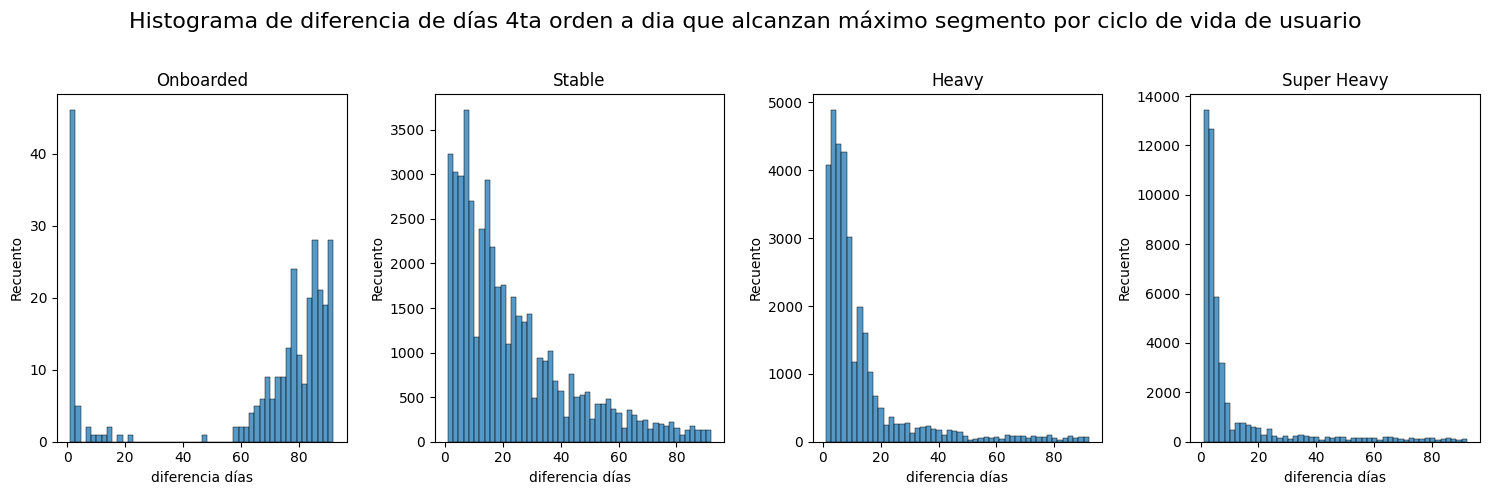

In [ ]:
### 3. ANALISIS DESCRIPTIVO (EDA)  ###

######### A)  HISTOGRAMA PARA LA VARIABLE DIA 4TA ORDEN QUE RELACIONA DIA 4TA ORDEN CON DIA MAX SEGMENTO ALCANZADO ########################
lifecycle_labels = {'1onboarded':'Onboarded', '2stable': 'Stable', '3heavy': 'Heavy', '4super heavy': 'Super Heavy'}
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Histograma de diferencia de días 4ta orden a dia que alcanzan máximo segmento por ciclo de vida de usuario', fontsize=16)

# Histograma para la clase 'Onboarded'
sns.histplot(df[df['max_lifecycle_label'] == 'Onboarded']['dif_dias_4ta_orden_a_max_seg'], bins=50, ax=axes[0])
axes[0].set_title('Onboarded')
axes[0].set_xlabel('diferencia días')
axes[0].set_ylabel('Recuento')

# Histograma para la clase 'Stable'
sns.histplot(df[df['max_lifecycle_label'] == 'Stable']['dif_dias_4ta_orden_a_max_seg'], bins=50, ax=axes[1])
axes[1].set_title('Stable')
axes[1].set_xlabel('diferencia días')
axes[1].set_ylabel('Recuento')

# Histograma para la clase 'Heavy'
sns.histplot(df[df['max_lifecycle_label'] == 'Heavy']['dif_dias_4ta_orden_a_max_seg'], bins=50, ax=axes[2])
axes[2].set_title('Heavy')
axes[2].set_xlabel('diferencia días')
axes[2].set_ylabel('Recuento')

# Histograma para la clase 'Super Heavy'
sns.histplot(df[df['max_lifecycle_label'] == 'Super Heavy']['dif_dias_4ta_orden_a_max_seg'], bins=50, ax=axes[3])
axes[3].set_title('Super Heavy')
axes[3].set_xlabel('diferencia días')
axes[3].set_ylabel('Recuento')

# Ajustar el espaciado entre los subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

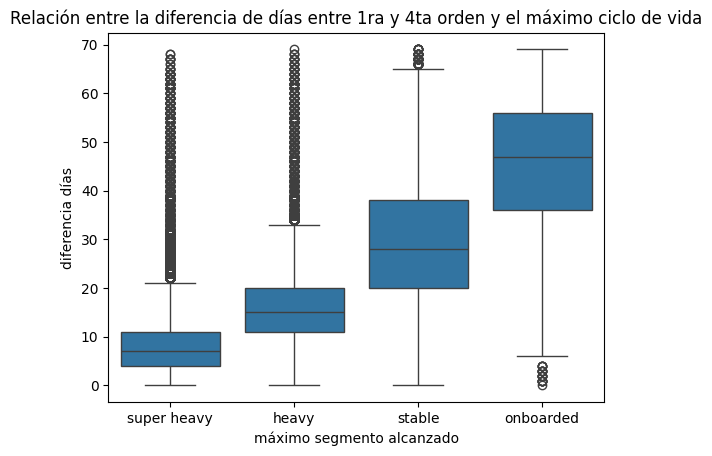

In [ ]:
############ B) BOXPLOT Relación entre el Tiempo Transcurrido entre Órdenes (Frecuencia de Compra) y max_lifecycle ########################
# Mapeo de etiquetas para el eje X
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar el cambio en la columna
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

# Crear el boxplot con las etiquetas corregidas
sns.boxplot(x='max_lifecycle_label', y='dif_dias_1ra_4ta_orden', data=df)

# Cambiar los nombres de los ejes
plt.xlabel("máximo segmento alcanzado")
plt.ylabel("diferencia días")

# Título de la gráfica
plt.title('Relación entre la diferencia de días entre 1ra y 4ta orden y el máximo ciclo de vida')

plt.show()

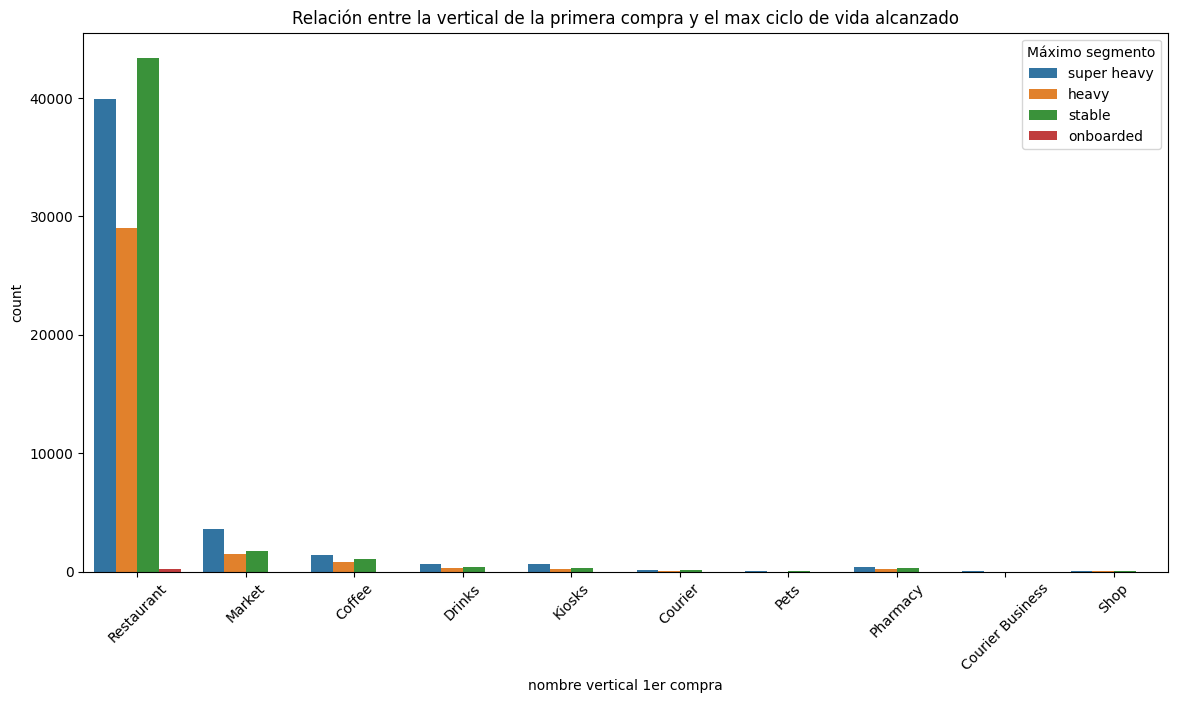

In [ ]:
############ C.1) GRAFICO DE BARRAS Relación entre la Vertical de la Primera Compra y `max_lifecycle`: ########################
# Mapeo de etiquetas para la leyenda
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar los cambios en la columna para que se reflejen en la gráfica
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

plt.figure(figsize=(14, 7))
sns.countplot(x='vertical_name_1er_compra', hue='max_lifecycle_label', data=df)

# Cambiar el título de la gráfica
plt.title('Relación entre la vertical de la primera compra y el max ciclo de vida alcanzado')

# Cambiar el label del eje X
plt.xlabel("nombre vertical 1er compra")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Modificar la leyenda con el nuevo título
plt.legend(title="Máximo segmento")

plt.show()

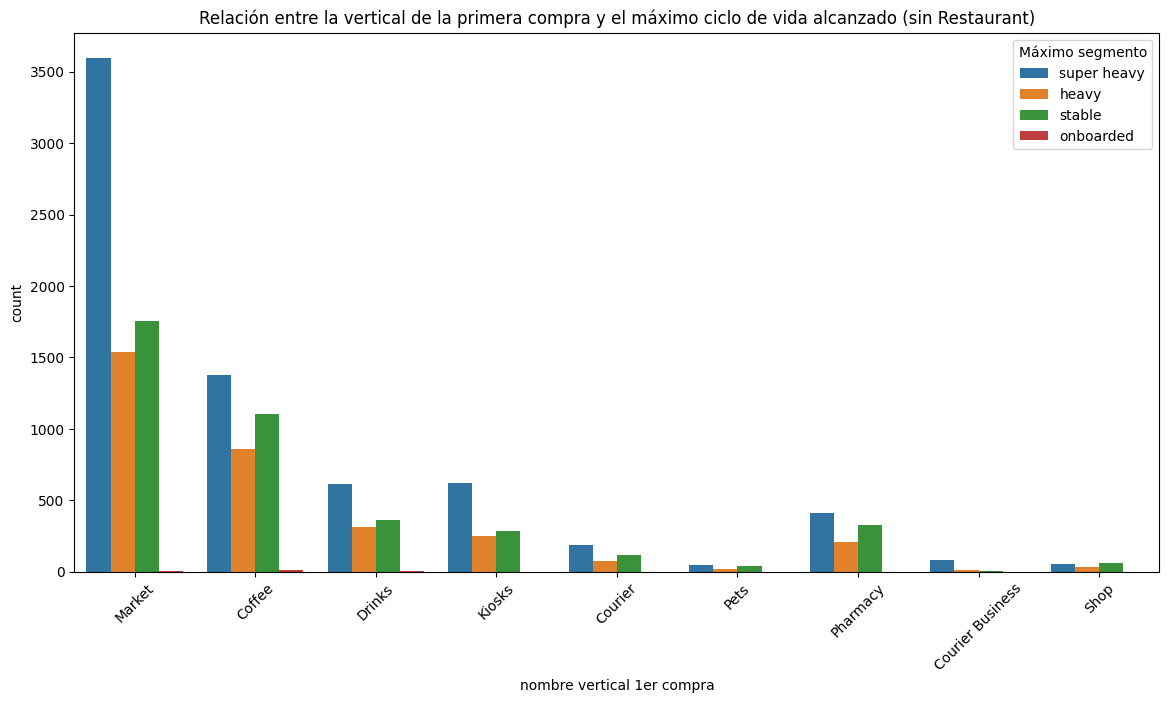

In [ ]:
# Mapeo de etiquetas para la leyenda
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar los cambios en la columna para que se reflejen en la gráfica
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

# Filtrar el DataFrame para excluir "Restaurant"
df_filtered = df[df['vertical_name_1er_compra'] != 'Restaurant']

plt.figure(figsize=(14, 7))
sns.countplot(x='vertical_name_1er_compra', hue='max_lifecycle_label', data=df_filtered)

# Cambiar el título de la gráfica
plt.title('Relación entre la vertical de la primera compra y el máximo ciclo de vida alcanzado (sin Restaurant)')

# Cambiar el label del eje X
plt.xlabel("nombre vertical 1er compra")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Modificar la leyenda con el nuevo título
plt.legend(title="Máximo segmento")

plt.show()


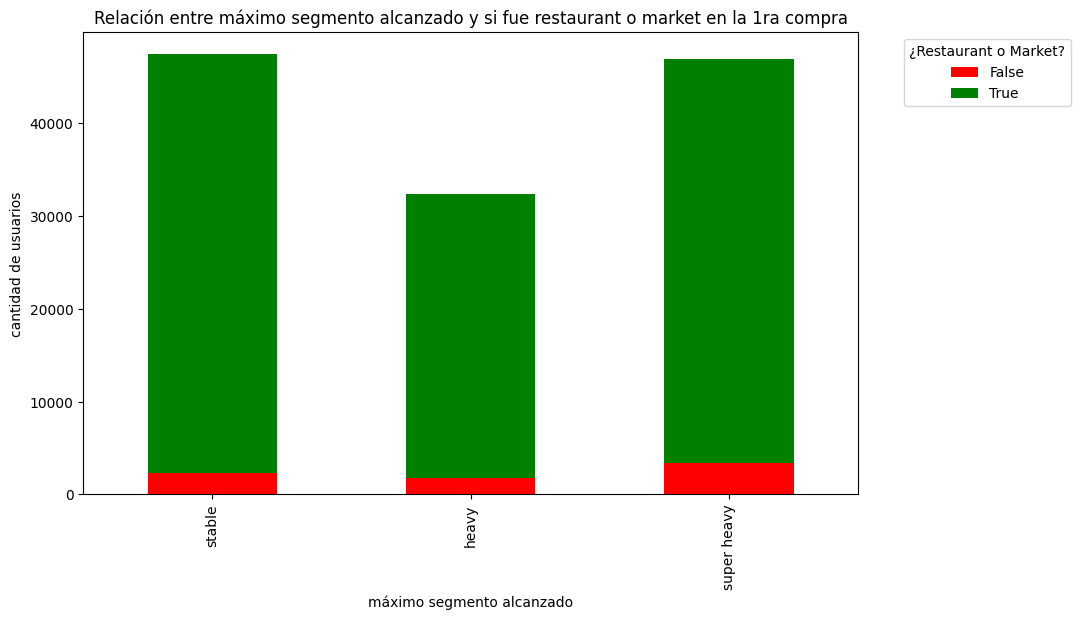

In [ ]:
############ C.2) GRAFICO DE BARRAS APILADAS Relación entre is_restaurant_or_market_1ra y `max_lifecycle`: ########################
# Mapeo de etiquetas para la leyenda y el eje X
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Filtrar el dataframe para excluir '1onboarded'
df_filtered = df[df['max_lifecycle'] != '1onboarded'].copy()

# Aplicar el cambio en la columna para que se refleje en el gráfico
df_filtered['max_lifecycle_label'] = df_filtered['max_lifecycle'].map(lifecycle_labels)

# Crear la tabla cruzada
crosstab = pd.crosstab(df_filtered['max_lifecycle_label'], df_filtered['is_restaurant_or_market_1ra'])

# Ordenar las categorías en el eje X (stable → heavy → super heavy)
category_order = ['stable', 'heavy', 'super heavy']
crosstab = crosstab.reindex(category_order)

# Graficar el stacked bar chart con el orden corregido
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Actualizar el título y etiquetas
plt.title('Relación entre máximo segmento alcanzado y si fue restaurant o market en la 1ra compra')
plt.xlabel('máximo segmento alcanzado')
plt.ylabel('cantidad de usuarios')

# Modificar la leyenda
plt.legend(title='¿Restaurant o Market?', labels=['False', 'True'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<ipython-input-14-eb1db0bcd3b6>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(crosstab_percentage, annot=crosstab_percentage.applymap(lambda v: f'{v:.0f}%'), cmap="YlGnBu", fmt="")


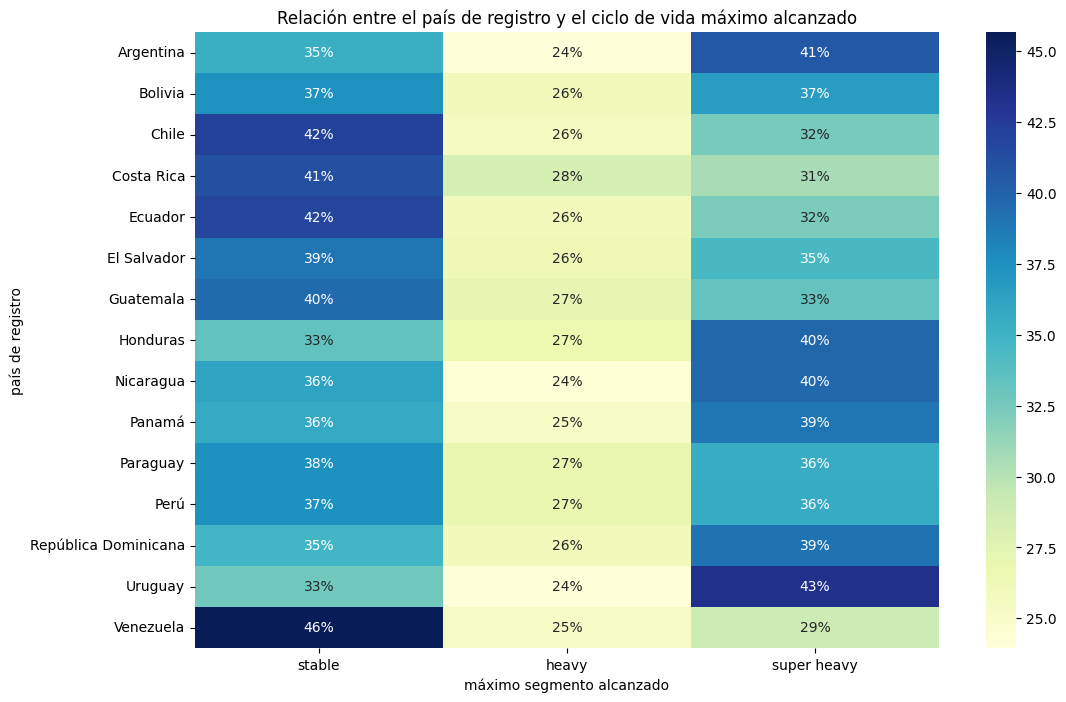

In [ ]:
############ D) HEATMAP Relación entre el País de Registro y max_lifecycle ########################
###################################################################
# Mapeo de etiquetas para la leyenda y el eje X
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable'}

# Excluir '1onboarded' de la columna 'max_lifecycle'
df_filtered = df[df['max_lifecycle'] != '1onboarded'].copy()

# Aplicar los cambios en la columna para que se reflejen en el gráfico
df_filtered['max_lifecycle_label'] = df_filtered['max_lifecycle'].map(lifecycle_labels)

# Crear la tabla de contingencia con los datos filtrados y ordenar las columnas
crosstab_percentage = pd.crosstab(df_filtered['pais_registro_user'], df_filtered['max_lifecycle_label'], normalize='index') * 100

# Ordenar las columnas en el orden deseado
column_order = ['stable', 'heavy', 'super heavy']
crosstab_percentage = crosstab_percentage[column_order]

# Graficar el heatmap con las columnas ordenadas
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_percentage, annot=crosstab_percentage.applymap(lambda v: f'{v:.0f}%'), cmap="YlGnBu", fmt="")

# Actualizar el título y etiquetas
plt.title('Relación entre el país de registro y el ciclo de vida máximo alcanzado')
plt.xlabel('máximo segmento alcanzado')
plt.ylabel('país de registro')

plt.show()


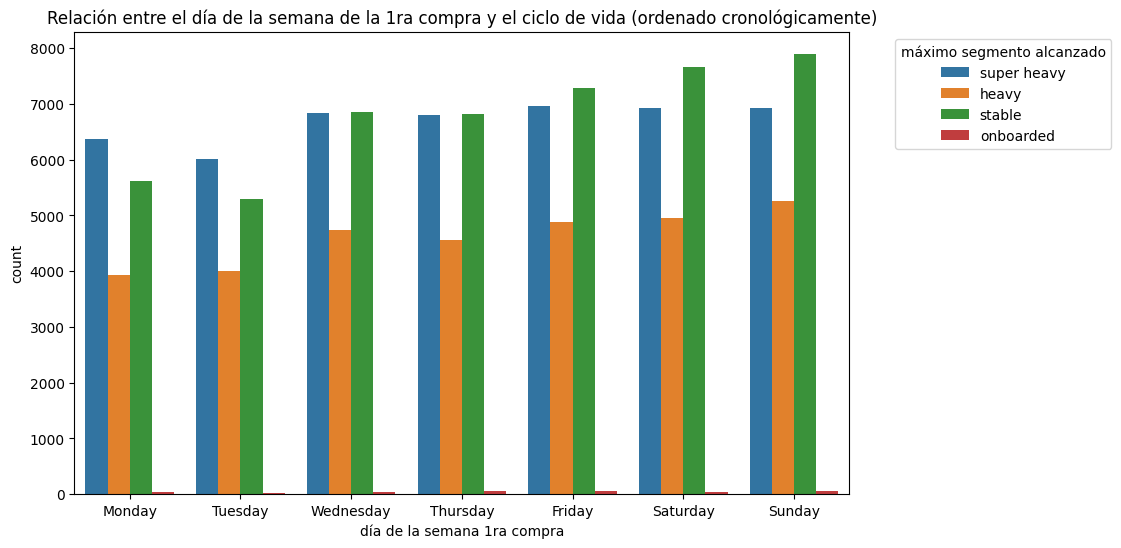

In [ ]:
############ E) GRAFICO DE BARRAS Relación entre el Día de la Semana de la Primera Compra y max_lifecycle ########################
# Definir el orden cronológico de los días de la semana
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Contar el número de registros por día de la semana
df_day_order = df.groupby('dia_semana_1er_compra').size().reset_index(name='count')

# Aplicar el orden cronológico de los días de la semana
df_day_order['dia_semana_1er_compra'] = pd.Categorical(df_day_order['dia_semana_1er_compra'], categories=week_order, ordered=True)

# Ordenar el DataFrame con el nuevo orden cronológico
df_day_order = df_day_order.sort_values(by='dia_semana_1er_compra')

# Mapeo de etiquetas para la leyenda
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar el cambio en la columna para que se refleje en la gráfica
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='dia_semana_1er_compra', hue='max_lifecycle_label', data=df, order=week_order)

# Cambiar la leyenda
plt.legend(title='máximo segmento alcanzado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Cambiar la etiqueta del eje X
plt.xlabel("día de la semana 1ra compra")

# Título del gráfico
plt.title('Relación entre el día de la semana de la 1ra compra y el ciclo de vida (ordenado cronológicamente)')

plt.show()


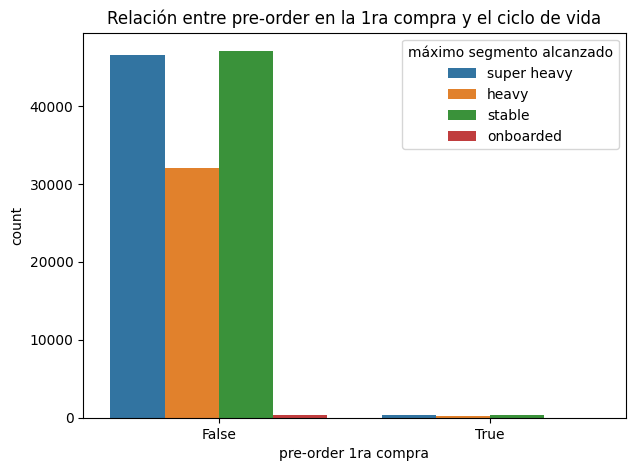

In [ ]:
############ F) GRAFICO DE BARRAS Relación entre el Uso de Pre-Orders en la Primera Compra y `max_lifecycle` ########################
# Mapeo de etiquetas para la leyenda
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar el cambio en la columna para que se refleje en la gráfica
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

# Crear el gráfico
plt.figure(figsize=(7, 5))
sns.countplot(x='is_pre_order_1er_compra', hue='max_lifecycle_label', data=df)

# Cambiar el título y etiquetas
plt.title('Relación entre pre-order en la 1ra compra y el ciclo de vida')
plt.xlabel("pre-order 1ra compra")

# Mover la leyenda dentro del gráfico en la esquina superior derecha
plt.legend(title='máximo segmento alcanzado', loc='upper right', frameon=True)

plt.show()


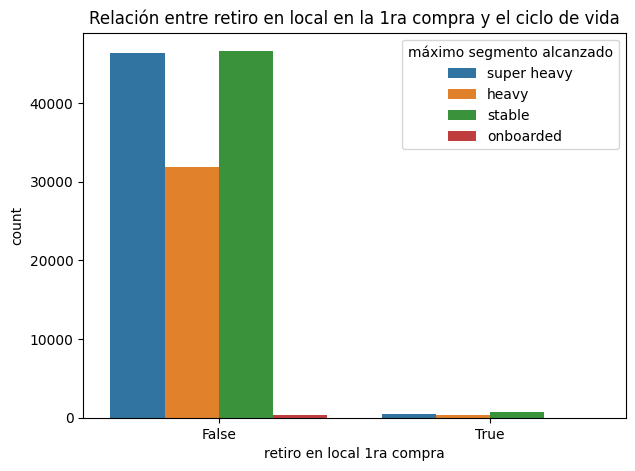

In [ ]:
############ G) GRAFICO DE BARRAS  Relación entre el Tipo de Entrega de la Primera Compra (Pickup vs. Delivery) y `max_lifecycle` ########################
# Mapeo de etiquetas para la leyenda
lifecycle_labels = {'4super heavy': 'super heavy',
                    '3heavy': 'heavy',
                    '2stable': 'stable',
                    '1onboarded': 'onboarded'}

# Aplicar el cambio en la columna para que se refleje en la gráfica
df['max_lifecycle_label'] = df['max_lifecycle'].map(lifecycle_labels)

# Crear el gráfico
plt.figure(figsize=(7, 5))
sns.countplot(x='is_pickup_1er_compra', hue='max_lifecycle_label', data=df)

# Cambiar el título y etiquetas
plt.title('Relación entre retiro en local en la 1ra compra y el ciclo de vida')
plt.xlabel("retiro en local 1ra compra")

# Mover la leyenda dentro del gráfico en la esquina superior derecha
plt.legend(title='máximo segmento alcanzado', loc='upper right', frameon=True)

plt.show()

In [ ]:
# H) Cuadro de resultados con el promedio de ordenes (variable para el feature engineering luego)

# Convertir las columnas de fecha a tipo datetime para calcular diferencias de días
df['dia_1er_compra'] = pd.to_datetime(df['dia_1er_compra'])
df['dia_2da_compra'] = pd.to_datetime(df['dia_2da_compra'])
df['dia_3ra_compra'] = pd.to_datetime(df['dia_3ra_compra'])
df['dia_4ta_compra'] = pd.to_datetime(df['dia_4ta_compra'])

# calculo diferencias entre cada par de órdenes
df['dif_1er_2da'] = df['dia_2da_compra'] - df['dia_1er_compra']
df['dif_2da_3ra'] = df['dia_3ra_compra'] - df['dia_2da_compra']
df['dif_3ra_4ta'] = df['dia_4ta_compra'] - df['dia_3ra_compra']

df['avg_days_between_orders'] = (df['dif_1er_2da'] + df['dif_2da_3ra'] + df['dif_3ra_4ta']) / 3

df['avg_days_between_orders'] = df['avg_days_between_orders'].dt.total_seconds() / (24 * 3600)

avg_days_per_segment = df.groupby('max_lifecycle')['avg_days_between_orders'].mean()

avg_days_per_segment


,avg_days_between_orders
max_lifecycle,
1onboarded,14.280093
2stable,9.726347
3heavy,5.506291
4super heavy,2.947519


In [ ]:
## Preprocesamiento de datos
# Convertir fechas a tipo datetime
df['dia_max_segmento_alcanzado'] = pd.to_datetime(df['dia_max_segmento_alcanzado'])

# Crear nuevas características a partir de las fechas
df['year_1er_compra'] = df['dia_1er_compra'].dt.year
df['month_1er_compra'] = df['dia_1er_compra'].dt.month
df['day_1er_compra'] = df['dia_1er_compra'].dt.day

df['year_2da_compra'] = df['dia_2da_compra'].dt.year
df['month_2da_compra'] = df['dia_2da_compra'].dt.month
df['day_2da_compra'] = df['dia_2da_compra'].dt.day

df['year_3ra_compra'] = df['dia_3ra_compra'].dt.year
df['month_3ra_compra'] = df['dia_3ra_compra'].dt.month
df['day_3ra_compra'] = df['dia_3ra_compra'].dt.day

df['year_4ta_compra'] = df['dia_4ta_compra'].dt.year
df['month_4ta_compra'] = df['dia_4ta_compra'].dt.month
df['day_4ta_compra'] = df['dia_4ta_compra'].dt.day

df['year_max_segmento'] = df['dia_max_segmento_alcanzado'].dt.year
df['month_max_segmento'] = df['dia_max_segmento_alcanzado'].dt.month
df['day_max_segmento'] = df['dia_max_segmento_alcanzado'].dt.day



max_lifecycle  1onboarded  2stable  3heavy  4super heavy
year_month                                              
2024-01                 9       64    2240          9285
2024-02                35    11643   15486         20778
2024-03                17    25427   11903         13025
2024-04                 1     7923    1781          2395
2024-05               187     2224     832          1272


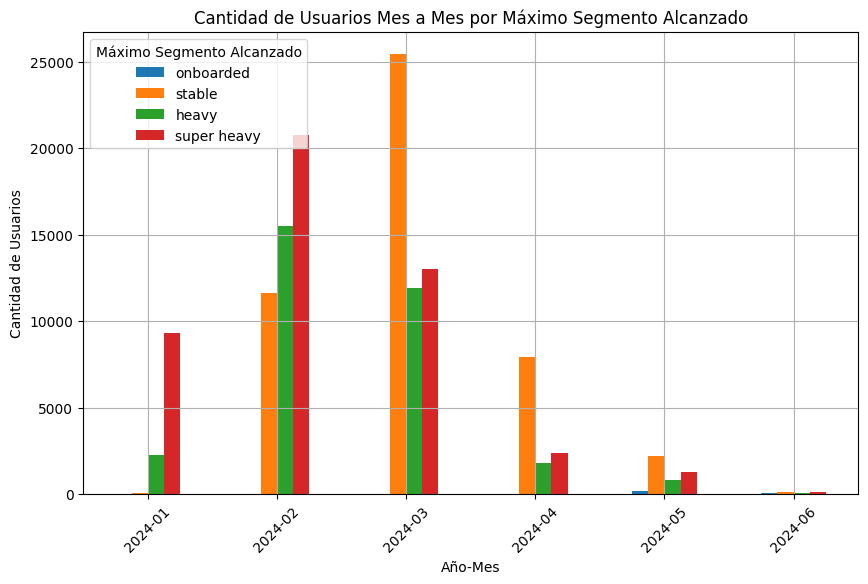

In [ ]:
# I) gráfico de barras para ver la cantidad de usuarios por segmento máximo alcanzado mes a mes
usuarios_por_mes = df.groupby(['year_max_segmento', 'month_max_segmento', 'max_lifecycle'])['user_id'].nunique().reset_index()
usuarios_por_mes['year_month'] = usuarios_por_mes['year_max_segmento'].astype(str) + '-' + usuarios_por_mes['month_max_segmento'].astype(str).str.zfill(2)

usuarios_por_mes.rename(columns={'user_id': 'cantidad_usuarios'}, inplace=True)

usuarios_por_mes_pivot = usuarios_por_mes.pivot(index='year_month', columns='max_lifecycle', values='cantidad_usuarios')

usuarios_por_mes_pivot = usuarios_por_mes_pivot.fillna(0)  # Relleno valores NaN con 0 (en caso de que no haya usuarios en algún mes para ciertos segmentos)

print(usuarios_por_mes_pivot.head())

# Mapeo de etiquetas para visualización
etiquetas_nuevas = {
    '1onboarded': 'onboarded',
    '2stable': 'stable',
    '3heavy': 'heavy',
    '4super heavy': 'super heavy'
}

# Cambiar etiquetas en la leyenda sin afectar los datos
usuarios_por_mes_pivot.rename(columns=etiquetas_nuevas, inplace=False).plot(kind='bar', figsize=(10, 6))

plt.title('Cantidad de Usuarios Mes a Mes por Máximo Segmento Alcanzado')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Máximo Segmento Alcanzado', loc='upper left')

plt.grid(True)
plt.show()


In [ ]:
df = df.drop(columns=['dia_1er_compra', 'dia_2da_compra', 'dia_3ra_compra', 'dia_4ta_compra', 'dia_max_segmento_alcanzado']) # estas ya las dropeo de mi dataset y uso lo de arriba

In [ ]:
###################### 4. FEATURE ENGINEERING  #############################################
# hecho en la query tengo
# A) dif_dias_1ra_4ta_orden
# B) dif_dias_4ta_orden_a_hoy
# C) dif_dias_4ta_orden_a_max_seg
# D) dif_dias_1er_orden_a_max_seg
# E) avg_days_per_segment
# F) log_avg_days_between_orders
df['log_avg_days_between_orders'] = np.log1p(df['avg_days_between_orders'])

# Definir columnas categóricas -> No uso dia_semana_max_segmento_alcanzado en el one hot encoding
categorical_columns = ['pais_registro_user'                            , 'dia_semana_1er_compra',
                       'vertical_name_1er_compra', 'country_1er_compra', 'dia_semana_2da_compra',
                       'vertical_name_2da_compra', 'country_2da_compra', 'dia_semana_3ra_compra',
                       'vertical_name_3ra_compra', 'country_3ra_compra', 'dia_semana_4ta_compra',
                       'vertical_name_4ta_compra', 'country_4ta_compra']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True) # Aplicar One-Hot Encoding a columnas categóricas

print(df.head())

    user_id dia_semana_max_segmento_alcanzado max_lifecycle  \
1  70591858                         Wednesday  4super heavy   
2  70592125                         Wednesday  4super heavy   
3  70604050                            Monday        3heavy   
4  70602102                          Thursday  4super heavy   
5  70613721                            Friday  4super heavy   

   is_restaurant_or_market_1ra  is_pre_order_1er_compra  is_pickup_1er_compra  \
1                         True                    False                 False   
2                         True                    False                 False   
3                         True                    False                 False   
4                         True                    False                 False   
5                        False                    False                 False   

   is_restaurant_or_market_2da  is_pre_order_2da_compra  is_pickup_2da_compra  \
1                         True                    Fal

In [ ]:
### 5. DROPEO DE COLUMNAS + PREDICCION  ###
X = df.drop(columns= ['user_id', 'max_lifecycle', 'year_max_segmento', 'month_max_segmento',
                     'day_max_segmento', 'dia_semana_max_segmento_alcanzado',
                     'dif_dias_4ta_orden_a_hoy', 'dif_dias_4ta_orden_a_max_seg',
                     'dif_dias_1er_orden_a_max_seg', 'max_lifecycle_label'])

##########################################################################################################
############ MULTICOLINEALIDAD

############ VIF ###########
# # Eliminar variables con baja varianza
# selector = VarianceThreshold(threshold=0.01)
# selector.fit(X)
# X_filtered = X[X.columns[selector.get_support(indices=True)]]

# # Agregar una constante (columna de 1s) al conjunto de datos
# X_with_const = sm.add_constant(X_filtered)  # Añade la constante

# # Crear un DataFrame para guardar los resultados de VIF
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_filtered.columns  # No incluir la constante aquí

# # Escalar solo las variables explicativas (sin la constante)
# scalerVIF = StandardScaler()
# X_scaled = scalerVIF.fit_transform(X_filtered)  # Solo escalar X_filtered

# # Calcular el VIF con las variables escaladas (ignorar la constante)
# vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# # Imprimir el resultado
# print("El dataframe de VIF es:", vif_data)


############ MATRIZ DE CORRELACION ###########
######################### POR AHORA LA COMENTO
# n_variables_per_heatmap = 20 # num_columnas / 20 => 155 / 20

# # Dividir las columnas de la matriz de correlación en grupos
# columns = X.columns
# column_groups = [columns[i:i + n_variables_per_heatmap] for i in range(0, len(columns), n_variables_per_heatmap)]

# # Crear un heatmap para cada grupo de columnas
# for i, group in enumerate(column_groups):
#     plt.figure(figsize=(20, 16))
#     corr_matrix_group = X[group].corr()  # Sub-matriz de correlación para este grupo
#     sns.heatmap(corr_matrix_group, annot=True, cmap='Reds', vmin=-1, vmax=1, center=0, fmt=".2f",
#                 linewidths=.5, cbar_kws={"shrink": .8})
#     plt.title(f'Matriz de correlación entre las variables - Grupo {i+1}', fontsize=16)
#     plt.xticks(rotation=45, ha='right', fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.tight_layout()  # Ajustar el layout para que todo encaje bien
#     plt.show()

In [ ]:
y = df['max_lifecycle']

# # (4super heavy > 3 heavy > 2stable > 1onboarded), voy a usar label encoder para codificar la variable objetivo
# Eliminar la clase 'Onboarded' de y
y_filtered = y[y != '1onboarded']
X_filtered = X.loc[y != '1onboarded']

# Ahora aplicamos el LabelEncoder solo a las clases restantes
le = LabelEncoder()
y_filtered = le.fit_transform(y_filtered)

# Clases después del LabelEncoder (serían 0, 1, 2): ['2stable' '3heavy' '4super heavy']
print("Clases después del LabelEncoder (serían 0, 1, 2):", le.classes_)

# Convertir columnas de tiempo a segundos
for column in X_filtered.select_dtypes(include=['timedelta64[ns]']).columns:
    X_filtered[column] = X_filtered[column].dt.total_seconds() / (24 * 3600)

# Dividir en entrenamiento y test (manteniendo test aparte) => con stratify=y_filtered al final
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=11, stratify=y_filtered)

# Aplicar escalado solo a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Clases después del LabelEncoder (serían 0, 1, 2): ['2stable' '3heavy' '4super heavy']


<ipython-input-26-604924bea8f4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered[column] = X_filtered[column].dt.total_seconds() / (24 * 3600)


In [ ]:
#############################################################
#############################################################
################# C V   P A R A   B O R U T A ###############
#############################################################
#############################################################
# Aplicar validación cruzada en Boruta
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
selected_features = np.zeros(X_train_scaled.shape[1])  # Para contar qué variables son seleccionadas en cada fold

for train_idx, val_idx in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=3, random_state=11)
    boruta = BorutaPy(rf, n_estimators=100, verbose=2, random_state=11, max_iter=20, perc=90)  # Optimizado porque sino no terminaba

    # Usar solo una muestra para Boruta
    sample_size = min(5000, X_train_fold.shape[0])  # Acelera Boruta con solo 5000 filas
    idx_sample = np.random.choice(X_train_fold.shape[0], sample_size, replace=False)
    boruta.fit(X_train_fold[idx_sample], y_train_fold[idx_sample])

    selected_features += boruta.support_

# Seleccionar solo las variables que fueron elegidas en la mayoría de los folds
threshold = cv.get_n_splits() // 2  # Al menos en la mitad de los folds
final_selected_features = selected_features >= threshold

X_train_selected = X_train_scaled[:, final_selected_features]
X_test_selected = X_test_scaled[:, final_selected_features]

# print("Datos de X entrenamiento escalados en formato cantidad filas-columnas", X_train_scaled.shape)              # Datos de X entrenamiento escalados en formato cantidad filas-columnas (101262, 160)
# print("Datos de X testeo escalados en formato cantidad filas-columnas",        X_test_scaled.shape)               # Datos de X testeo escalados en formato cantidad filas-columnas (25316, 160)
selected_feature_names = X_train.columns[final_selected_features]
print("Variables seleccionadas por Boruta:")
print(selected_feature_names)
print(f"Número de variables seleccionadas por Boruta con CV: {X_train_selected.shape[1]}")                        # Número de variables seleccionadas por Boruta con CV: 20
print("Datos de X entrenamiento escalados en formato cantidad filas-columnas con Boruta", X_train_selected.shape) # Datos de X entrenamiento escalados en formato cantidad filas-columnas con Boruta (101262, 20)
print("Datos de X testeo escalados en formato cantidad filas-columnas con Boruta",        X_test_selected.shape)  # Datos de X testeo escalados en formato cantidad filas-columnas con Boruta (25316, 20)


Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	160
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	17
Tentative: 	48
Rejected: 	95
Iteration: 	9 / 20
Confirmed: 	17
Tentative: 	48
Rejected: 	95
Iteration: 	10 / 20
Confirmed: 	17
Tentative: 	48
Rejected: 	95
Iteration: 	11 / 20
Confirmed: 	17
Tentative: 	48
Rejected: 	95
Iteration: 	12 / 20
Confirmed: 	18
Tentative: 	28
Rejected: 	114
Iteration: 	13 / 20
Confirmed: 	18
Tentative: 	28
Rejected: 	114
Iteration: 	14 / 20
Confirmed: 	18
Tentative: 	28
Rejected: 	114
Iteration: 	15 / 20
Confirmed: 	18
Tentative: 	28
Rejected: 	114
Iteration: 	16 / 20
Confirmed: 	18
Tentative: 	16
Re

In [ ]:
#####################################################################
# K  N E I G H B O R S
# Usar validación cruzada en el conjunto de entrenamiento
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11) # QUEDA K=10
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_scores = cross_val_score(knn, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores:", cross_val_scores)
print("Mean CV Accuracy:", mean_cv_accuracy)

####################################################################
# Entrenar el modelo final con todo el conjunto de entrenamiento
knn.fit(X_train_selected, y_train)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = knn.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy en Test KNN:", test_accuracy)
print("\nConfusion Matrix KNN:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report KNN:\n", classification_report(y_test, y_pred))

#######################################
# K-fold=10 y KNN = 7 + BORUTA
# Cross-validation scores: [0.65063691 0.66001777 0.65929291 0.65494766 0.65326881 0.65475015
#  0.65277503 0.66215682 0.6539601  0.65435513]
# Mean CV Accuracy: 0.6556161302124679
# (ESTE VA) Accuracy en Test KNN: 0.6539737715278875

# Antes
# Accuracy KNN: 0.5766313793648286


Cross-validation scores: [0.65063691 0.66001777 0.65929291 0.65494766 0.65326881 0.65475015
 0.65277503 0.66215682 0.6539601  0.65435513]
Mean CV Accuracy: 0.6556161302124679
Accuracy en Test KNN: 0.6539737715278875

Confusion Matrix KNN:
 [[7037 1551  892]
 [2076 2708 1680]
 [1023 1538 6811]]

Classification Report KNN:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72      9480
           1       0.47      0.42      0.44      6464
           2       0.73      0.73      0.73      9372

    accuracy                           0.65     25316
   macro avg       0.63      0.63      0.63     25316
weighted avg       0.65      0.65      0.65     25316



In [ ]:
####################################################################
# # Entrenamiento de R E G R E S I O N  L O G I S T I C A
# # Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)
model_RL = LogisticRegression(max_iter=1000, random_state=11)
cross_val_scores = cross_val_score(model_RL, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RL:", cross_val_scores)
print("Mean CV Accuracy RL:", mean_cv_accuracy)

# Entrenar el modelo final con todo el conjunto de entrenamiento
model_RL.fit(X_train_selected, y_train)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = model_RL.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy en Test RL:", test_accuracy)
print("\nConfusion Matrix RL:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RL:\n", classification_report(y_test, y_pred))

# Cross-validation scores RL: [0.68756789 0.69181396 0.695635   0.68980841 0.68882086 0.69316611
#  0.69405491 0.69365989 0.69425242 0.69701758]
# Mean CV Accuracy RL: 0.6925797019370876
# (ESTE VA) Accuracy en Test RL: 0.6893664085953547

#Antes
#Accuracy RL: 0.6894454100173804


Cross-validation scores RL: [0.68756789 0.69181396 0.695635   0.68980841 0.68882086 0.69316611
 0.69405491 0.69365989 0.69425242 0.69701758]
Mean CV Accuracy RL: 0.6925797019370876
Accuracy en Test RL: 0.6893664085953547

Confusion Matrix RL:
 [[7227 1433  820]
 [1818 3098 1548]
 [ 860 1385 7127]]

Classification Report RL:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      9480
           1       0.52      0.48      0.50      6464
           2       0.75      0.76      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.68      0.69      0.69     25316



In [ ]:
################### NUEVO
# Entrenamiento de R E G R E S I Ó N  L O G Í S T I C A  M U L T I N O M I A L
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Modelo ajustado a regresión logística multinomial
model_RL = LogisticRegression(max_iter=1000, random_state=11, multi_class='multinomial', solver='lbfgs')

cross_val_scores = cross_val_score(model_RL, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RL:", cross_val_scores)
print("Mean CV Accuracy RL:", mean_cv_accuracy)

# Entrenar el modelo final con todo el conjunto de entrenamiento
model_RL.fit(X_train_selected, y_train)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = model_RL.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy en Test RL:", test_accuracy)
print("\nConfusion Matrix RL:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RL:\n", classification_report(y_test, y_pred))

# Cross-validation scores RL: [0.68756789 0.69181396 0.695635   0.68980841 0.68882086 0.69316611
#  0.69405491 0.69365989 0.69425242 0.69701758]
# Mean CV Accuracy RL: 0.6925797019370876
# /usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
#   warnings.warn(
# Accuracy en Test RL: 0.6893664085953547


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Cross-validation scores RL: [0.68756789 0.69181396 0.695635   0.68980841 0.68882086 0.69316611
 0.69405491 0.69365989 0.69425242 0.69701758]
Mean CV Accuracy RL: 0.6925797019370876


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy en Test RL: 0.6893664085953547

Confusion Matrix RL:
 [[7227 1433  820]
 [1818 3098 1548]
 [ 860 1385 7127]]

Classification Report RL:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      9480
           1       0.52      0.48      0.50      6464
           2       0.75      0.76      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.68      0.69      0.69     25316



In [ ]:
# R E G R E S I O N  L O G I S T I C A    C O N   H I P E R P A R A M E T R O S
start_time = datetime.now()
print("Hora de inicio:", start_time)

# ######################################################################################################################################
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# ######## Caso 1 |  Penalty Ridge Regularization con valores de hiperparámetros
# # =====> Hipótesis Caso 1: entender la performance de los hiperparametros si es mejor o peor que el RL sin hiperparametros. Y ver con iteraciones de mejorarla
# param_grid = {
#     'C': [0.001, 0.01],
#     'solver': ['liblinear'],
#     'penalty': ['l2'],
#     'max_iter': [5,10]
# }

# ###### Resultado
# Cross-validation scores RL: [0.68391429 0.68934531 0.69128975 0.68664823 0.69010468 0.69227731
#  0.68941339 0.69237606 0.69119099 0.69365989]
# Mean CV Accuracy RL: 0.6900219903258638
# Hora de finalización: 2025-03-08 20:41:33.666913
# Tiempo de ejecución: 0:01:49.825143
# Mejores hiperparámetros encontrados RL: {'C': 0.01, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
# (ESTE VA) Accuracy en Test RL: 0.687154368778638

# Antes -> Accuracy RL con mejores hiperparámetros RL:  0.6868383630905356

# #######################################################################################################################################
# ######## Caso 2 |  Penalty Ridge Regularization con mas valores de los mismos hiperparámetros
# # =====> Hipótesis Caso 2: entender si a mayor C y a mayor max iter, performa mejor, pruebo la siguiente casuistica:
# param_grid = {
#     'C': [0.001, 0.01, 0.1],
#     'solver': ['liblinear'],
#     'penalty': ['l2'],
#     'max_iter': [5,10,15]
# }

# ###### Resultado
# Cross-validation scores RL: [0.68569172 0.69250518 0.69494371 0.68862335 0.69000593 0.69504246
#  0.69326486 0.69464744 0.69346237 0.69721509]
# Mean CV Accuracy RL: 0.6925402113677721
# Hora de finalización: 2025-03-08 20:34:56.876191
# Tiempo de ejecución: 0:03:56.705133
# Mejores hiperparámetros encontrados RL: {'C': 0.1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
# (ESTE VA) Accuracy en Test RL: 0.6894059093063675

# Antes -> Accuracy RL con mejores hiperparámetros RL: 0.6887738979301627

# #######################################################################################################################################
# ######## Caso 3 |  Penalty Lasso Regularization con mismos valores de hiperparámetros C y max_iter
# # =====> Hipótesis Caso 3: entender si con Lasso puedo mejorar el accuracy obtenido en caso 2 de hiperparametros de RL
# # ya que dió mejor con estos parametros de C y de max_iter, los mantengo y vario la penalty, y por ende tambien vario el solver

# param_grid = {
#     'C': [0.001, 0.01, 0.1],
#     'solver': ['liblinear','saga'],     # Uso los dos solver para Lasso
#     'penalty': ['l1'],                  # Ahora Lasso
#     'max_iter': [5,10,15]
# }

# ###### Resultado
#  (Antes) Debido a que no converge y que me pide incrementar el nro de iteraciones en el output que obtuve como resultado, voy a cambiar ciertos valores

# Cross-validation scores RL: [0.68746914 0.69240644 0.69603002 0.69030219 0.68842583 0.69365989
#  0.69444993 0.69316611 0.69425242 0.6965238 ]
# Mean CV Accuracy RL: 0.6926685771718335
# Hora de finalización: 2025-03-08 20:46:51.998283
# Tiempo de ejecución: 0:03:06.175139
# Mejores hiperparámetros encontrados RL: {'C': 0.1, 'max_iter': 15, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895639121504187



# #######################################################################################################################################
# ######## Caso 4 |  Penalty Lasso Regularization c otros valores


# param_grid = {
#     'C': [0.01, 0.1, 1],       # Ajuste en los valores de C -> uso C mas grandes ya que valores pequeños de C pueden hacer que el modelo tenga dificultades para ajustar los datos
#     'solver': ['saga'],        # Usar solo saga para Lasso (es gralmente mas adecuado y puede converger mas rapido que liblinear)
#     'penalty': ['l1'],
#     'max_iter': [50, 100, 150] # incremento iteraciones x10 veces en cada valor
# }

# ###### Resultado
# (Antes) Como no termina tampoco, por ende dejo 1 valor de C (el mayor que es 1), y dejo 1 iteracion y subo mucho la cantidad de max_iter

# Cross-validation scores RL: [0.68756789 0.69290017 0.6965238  0.69000593 0.68891961 0.69365989
#  0.69336362 0.69415366 0.69306735 0.69761011]
# Mean CV Accuracy RL: 0.6927772025670976
# Hora de finalización: 2025-03-08 20:57:23.960607
# Tiempo de ejecución: 0:07:54.238812
# Mejores hiperparámetros encontrados RL: {'C': 1, 'max_iter': 150, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895244114394059

# #######################################################################################################################################
# ######## Caso 5 |  Penalty Lasso Regularization c otros valores
param_grid = {
    'C': [1],
    'solver': ['saga'],
    'penalty': ['l1'],
    'max_iter': [1000]
}

# ###### Resultado
# (Antes) corrí asi mas de 20 minutos y no convergió con estos parametros, por ende no voy a utilizar Lasso, sino que me quedo con Ridge directo y sus variantes

# Cross-validation scores RL: [0.68756789 0.69280142 0.6965238  0.69000593 0.68891961 0.69356113
#  0.69326486 0.69415366 0.69306735 0.69770887]
# Mean CV Accuracy RL: 0.6927574524065795
# Hora de finalización: 2025-03-08 21:03:57.648307
# Tiempo de ejecución: 0:04:58.841547
# Mejores hiperparámetros encontrados RL: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895244114394059


# ######################################################################################################################
# ######################################################################################################################
# ######################################################################################################################
# Configurar la búsqueda en cuadrícula con validación cruzada de 10 folds
grid_search = GridSearchCV(LogisticRegression(random_state=11), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_model_RL = grid_search.best_estimator_

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_RL, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RL:", cross_val_scores)
print("Mean CV Accuracy RL:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = best_model_RL.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

end_time = datetime.now()
print("Hora de finalización:", end_time)

execution_time = end_time - start_time
print("Tiempo de ejecución:", execution_time)

print("Mejores hiperparámetros encontrados RL:", grid_search.best_params_)
print("Accuracy en Test RL:", test_accuracy)
print("\nConfusion Matrix RL:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RL:\n", classification_report(y_test, y_pred))

Hora de inicio: 2025-03-08 20:58:58.806760
Cross-validation scores RL: [0.68756789 0.69280142 0.6965238  0.69000593 0.68891961 0.69356113
 0.69326486 0.69415366 0.69306735 0.69770887]
Mean CV Accuracy RL: 0.6927574524065795
Hora de finalización: 2025-03-08 21:03:57.648307
Tiempo de ejecución: 0:04:58.841547
Mejores hiperparámetros encontrados RL: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Accuracy en Test RL: 0.6895244114394059

Confusion Matrix RL:
 [[7225 1433  822]
 [1809 3106 1549]
 [ 855 1392 7125]]

Classification Report RL:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      9480
           1       0.52      0.48      0.50      6464
           2       0.75      0.76      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25316



In [ ]:
# R E G R E S I O N  L O G I S T I C A    M U L T I N O M I A L    C O N   H I P E R P A R A M E T R O S

start_time = datetime.now()
print("Hora de inicio:", start_time)

# ######################################################################################################################################
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# ######## Caso 1 |  Penalty Ridge Regularization con valores de hiperparámetros
# # =====> Hipótesis Caso 1: entender la performance de los hiperparametros si es mejor o peor que el RL sin hiperparametros. Y ver con iteraciones de mejorarla
param_grid = {
    'C': [0.001, 0.01],
    'solver': ['lbfgs'],
    'penalty': ['l2'],
    'max_iter': [5,10]
}

# ###### Resultado
# Cross-validation scores RL: [0.68391429 0.68934531 0.69128975 0.68664823 0.69010468 0.69227731
#  0.68941339 0.69237606 0.69119099 0.69365989]
# Mean CV Accuracy RL: 0.6900219903258638
# Hora de finalización: 2025-03-08 20:41:33.666913
# Tiempo de ejecución: 0:01:49.825143
# Mejores hiperparámetros encontrados RL: {'C': 0.01, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
# (ESTE VA) Accuracy en Test RL: 0.687154368778638

# Antes -> Accuracy RL con mejores hiperparámetros RL:  0.6868383630905356

# #######################################################################################################################################
# ######## Caso 2 |  Penalty Ridge Regularization con mas valores de los mismos hiperparámetros
# # =====> Hipótesis Caso 2: entender si a mayor C y a mayor max iter, performa mejor, pruebo la siguiente casuistica:
# param_grid = {
#     'C': [0.001, 0.01, 0.1],
#     'solver': ['lbfgs'],
#     'penalty': ['l2'],
#     'max_iter': [5,10,15]
# }

# ###### Resultado
# Cross-validation scores RL: [0.68569172 0.69250518 0.69494371 0.68862335 0.69000593 0.69504246
#  0.69326486 0.69464744 0.69346237 0.69721509]
# Mean CV Accuracy RL: 0.6925402113677721
# Hora de finalización: 2025-03-08 20:34:56.876191
# Tiempo de ejecución: 0:03:56.705133
# Mejores hiperparámetros encontrados RL: {'C': 0.1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
# (ESTE VA) Accuracy en Test RL: 0.6894059093063675

# Antes -> Accuracy RL con mejores hiperparámetros RL: 0.6887738979301627

# #######################################################################################################################################
# ######## Caso 3 |  Penalty Lasso Regularization con mismos valores de hiperparámetros C y max_iter
# # =====> Hipótesis Caso 3: entender si con Lasso puedo mejorar el accuracy obtenido en caso 2 de hiperparametros de RL
# # ya que dió mejor con estos parametros de C y de max_iter, los mantengo y vario la penalty, y por ende tambien vario el solver

# param_grid = {
#     'C': [0.001, 0.01, 0.1],
#     'solver': ['lbfgs','saga'],     # Uso los dos solver para Lasso
#     'penalty': ['l1'],                  # Ahora Lasso
#     'max_iter': [5,10,15]
# }

# ###### Resultado
#  (Antes) Debido a que no converge y que me pide incrementar el nro de iteraciones en el output que obtuve como resultado, voy a cambiar ciertos valores

# Cross-validation scores RL: [0.68746914 0.69240644 0.69603002 0.69030219 0.68842583 0.69365989
#  0.69444993 0.69316611 0.69425242 0.6965238 ]
# Mean CV Accuracy RL: 0.6926685771718335
# Hora de finalización: 2025-03-08 20:46:51.998283
# Tiempo de ejecución: 0:03:06.175139
# Mejores hiperparámetros encontrados RL: {'C': 0.1, 'max_iter': 15, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895639121504187



# #######################################################################################################################################
# ######## Caso 4 |  Penalty Lasso Regularization c otros valores
# param_grid = {
#     'C': [0.01, 0.1, 1],       # Ajuste en los valores de C -> uso C mas grandes ya que valores pequeños de C pueden hacer que el modelo tenga dificultades para ajustar los datos
#     'solver': ['saga'],        # Usar solo saga para Lasso (es gralmente mas adecuado y puede converger mas rapido que liblinear)
#     'penalty': ['l1'],
#     'max_iter': [50, 100, 150] # incremento iteraciones x10 veces en cada valor
# }

# ###### Resultado
# (Antes) Como no termina tampoco, por ende dejo 1 valor de C (el mayor que es 1), y dejo 1 iteracion y subo mucho la cantidad de max_iter

# Cross-validation scores RL: [0.68756789 0.69290017 0.6965238  0.69000593 0.68891961 0.69365989
#  0.69336362 0.69415366 0.69306735 0.69761011]
# Mean CV Accuracy RL: 0.6927772025670976
# Hora de finalización: 2025-03-08 20:57:23.960607
# Tiempo de ejecución: 0:07:54.238812
# Mejores hiperparámetros encontrados RL: {'C': 1, 'max_iter': 150, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895244114394059

# #######################################################################################################################################
# ######## Caso 5 |  Penalty Lasso Regularization c otros valores
# param_grid = {
#     'C': [1],
#     'solver': ['saga'],
#     'penalty': ['l1'],
#     'max_iter': [1000]
# }

# ###### Resultado
# (Antes) corrí asi mas de 20 minutos y no convergió con estos parametros, por ende no voy a utilizar Lasso, sino que me quedo con Ridge directo y sus variantes

# Cross-validation scores RL: [0.68756789 0.69280142 0.6965238  0.69000593 0.68891961 0.69356113
#  0.69326486 0.69415366 0.69306735 0.69770887]
# Mean CV Accuracy RL: 0.6927574524065795
# Hora de finalización: 2025-03-08 21:03:57.648307
# Tiempo de ejecución: 0:04:58.841547
# Mejores hiperparámetros encontrados RL: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
# (ESTE VA) Accuracy en Test RL: 0.6895244114394059

# ##################################################################################################
# ##################################################################################################
# ##################################################################################################
# # Configurar la búsqueda en cuadrícula con validación cruzada de 10 folds
grid_search = GridSearchCV(LogisticRegression(random_state=11, multi_class='multinomial', solver='lbfgs'),
                           param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train_selected, y_train)
best_model_RL = grid_search.best_estimator_

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_RL, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RL:", cross_val_scores)
print("Mean CV Accuracy RL:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = best_model_RL.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

end_time = datetime.now()
print("Hora de finalización:", end_time)

execution_time = end_time - start_time
print("Tiempo de ejecución:", execution_time)

print("Mejores hiperparámetros encontrados RL:", grid_search.best_params_)
print("Accuracy en Test RL:", test_accuracy)
print("\nConfusion Matrix RL:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RL:\n", classification_report(y_test, y_pred))


Hora de inicio: 2025-03-15 16:57:01.435937


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Cross-validation scores RL: [0.68292683 0.68944406 0.68832708 0.68635197 0.68645072 0.68704325
 0.69020344 0.69365989 0.6860557  0.69128975]
Mean CV Accuracy RL: 0.6881752679153693
Hora de finalización: 2025-03-15 16:57:30.550684
Tiempo de ejecución: 0:00:29.114747
Mejores hiperparámetros encontrados RL: {'C': 0.01, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy en Test RL: 0.6857323431821772

Confusion Matrix RL:
 [[7254 1242  984]
 [1827 2648 1989]
 [ 856 1058 7458]]

Classification Report RL:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75      9480
           1       0.54      0.41      0.46      6464
           2       0.71      0.80      0.75      9372

    accuracy                           0.69     25316
   macro avg       0.66      0.66      0.65     25316
weighted avg       0.67      0.69      0.68     25316



In [ ]:
######################################################################
# Entrenamiento del R A N D O M    F O R E S T

# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Entrenamiento del R A N D O M    F O R E S T
model_RF = RandomForestClassifier(random_state=11)
cross_val_scores = cross_val_score(model_RF, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF:", cross_val_scores)
print("Mean CV Accuracy RF:", mean_cv_accuracy)

# Entrenar el modelo final con todo el conjunto de entrenamiento
model_RF.fit(X_train_selected, y_train)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = model_RF.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy en Test RF:", test_accuracy)
print("\nConfusion Matrix RF:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF:\n", classification_report(y_test, y_pred))

# Antes Accuracy RF: 0.6689050402907253

# Cross-validation scores RF: [0.64757579 0.65192061 0.65257752 0.64833103 0.6512937  0.65060241
#  0.65079992 0.65702153 0.65336757 0.6504049 ]
# Mean CV Accuracy RF: 0.6513894973691904
# (ESTE VA) Accuracy en Test RF: 0.648404171275083

Cross-validation scores RF: [0.64757579 0.65192061 0.65257752 0.64833103 0.6512937  0.65060241
 0.65079992 0.65702153 0.65336757 0.6504049 ]
Mean CV Accuracy RF: 0.6513894973691904
Accuracy en Test RF: 0.648404171275083

Confusion Matrix RF:
 [[6893 1664  923]
 [1976 2792 1696]
 [1106 1536 6730]]

Classification Report RF:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      9480
           1       0.47      0.43      0.45      6464
           2       0.72      0.72      0.72      9372

    accuracy                           0.65     25316
   macro avg       0.63      0.63      0.63     25316
weighted avg       0.64      0.65      0.65     25316



In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   GridSearch
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

############################################################################################################################################
# Caso 1
# param_grid = {
#     'n_estimators':      [10],          # Número de árboles en el bosque
#     'max_depth':         [None],        # Profundidad máxima de cada árbol
#     'min_samples_split': [2],           # Muestras mínimas para dividir un nodo
#     'min_samples_leaf':  [1],           # Muestras mínimas para estar en una hoja
#     'max_features': ['auto', 'sqrt', 'log2'] # Número de características consideradas en cada división
# }

########## Resultado
# (Antes)
# Mejores parámetros para Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
# Accuracy RF con hiperparametros GridSearch: 0.648206667720019

# Mejores parámetros para Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
# Cross-validation scores RF: [0.63622001 0.63503505 0.64052933 0.63065376 0.63806044 0.63776417
#  0.63559155 0.63806044 0.63983804 0.63717164]
# Mean CV Accuracy RF: 0.636892442671729
# (ESTE VA) Accuracy RF con hiperparametros GridSearch: 0.6353294359298467


############################################################################################################################################
# Caso 2
# param_grid = {
#     'n_estimators': [10],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'max_features': ['sqrt', 0.5]  # 'sqrt' y valores numéricos para evitar errores
# }

########## Resultado
# Antes
# Mejores parámetros para Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
# Accuracy RF con hiperparametros GridSearch: 0.6880233844209196

# Mejores parámetros para Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
# Cross-validation scores RF: [0.68598795 0.69438136 0.69444993 0.69267233 0.69030219 0.6938574
#  0.69217855 0.69761011 0.69119099 0.69464744]
# Mean CV Accuracy RF: 0.692727825703044
# (ESTE VA) Accuracy RF con hiperparametros GridSearch: 0.6898799178385211


############################################################################################################################################
# Caso 3
param_grid = {
    'n_estimators': [30],
    'max_depth': [50,100,150],
    'min_samples_split': [5],
    'min_samples_leaf': [3],
    'max_features': ['sqrt',0.8]  # 'sqrt' y valores numéricos para evitar errores
}

# ########## Resultado
# Antes
# Mejores parámetros para Random Forest: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}
# Accuracy RF con hiperparametros GridSearch: 0.6845078211407806

# Mejores parámetros para Random Forest: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}
# Cross-validation scores RF: [0.67522465 0.67798953 0.68299427 0.67855027 0.68032787 0.68487063
#  0.68240174 0.68210547 0.68121667 0.68309303]
# Mean CV Accuracy RF: 0.6808774124611898
# (ESTE VA) Accuracy RF con hiperparametros GridSearch: 0.676568178227208


# ############################################################################################################################################
# ############################################################################################################################################
# ############################################################################################################################################
model_RF = RandomForestClassifier(random_state=11)
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores parámetros para Random Forest:", best_params)

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF:", cross_val_scores)
print("Mean CV Accuracy RF:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = best_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy RF con hiperparametros GridSearch:", test_accuracy)
print("\nConfusion Matrix RF con hiperparametros GridSearch:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF con hiperparametros GridSearch:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Mejores parámetros para Random Forest: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}
Cross-validation scores RF: [0.67522465 0.67798953 0.68299427 0.67855027 0.68032787 0.68487063
 0.68240174 0.68210547 0.68121667 0.68309303]
Mean CV Accuracy RF: 0.6808774124611898
Accuracy RF con hiperparametros GridSearch: 0.676568178227208

Confusion Matrix RF con hiperparametros GridSearch:
 [[7012 1615  853]
 [1794 3022 1648]
 [ 892 1386 7094]]

Classification Report RF con hiperparametros GridSearch:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      9480
           1       0.50      0.47      0.48      6464
           2       0.74      0.76      0.75      9372

    accuracy                           0.68     25316
   macro avg       0.65      0.65      0.65     25316
weighted avg       0.67      0.68      0.67     25316


In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   RandomizedSearchCV
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_dist_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=11),
                                      param_distributions=param_dist_rf,
                                      n_iter=10,
                                      cv=cv,
                                      scoring='accuracy',
                                      random_state=11)

random_search_rf.fit(X_train_selected, y_train)
best_model_rf = random_search_rf.best_estimator_

print("Mejores hiperparámetros RF RandomizedSearchCV:", random_search_rf.best_params_)

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_rf, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF RandomizedSearchCV:", cross_val_scores)
print("Mean CV Accuracy RF RandomizedSearchCV:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = best_model_rf.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy RF con hiperparámetros RandomizedSearchCV:", test_accuracy)
print("\nConfusion Matrix RF con hiperparámetros RandomizedSearchCV:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF con hiperparámetros RandomizedSearchCV:\n", classification_report(y_test, y_pred))


# ######## Resultado
# Antes
# Mejores hiperparámetros RF RandomizedSearchCV : {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
# Accuracy RF con hiperparámetros RandomizedSearchCV : 0.690867435613841

# Mejores hiperparámetros RF RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
# Cross-validation scores RF RandomizedSearchCV: [0.68756789 0.69467759 0.6974126  0.68970966 0.6904997  0.69731385
#  0.695635   0.69612878 0.69365989 0.69632629]
# Mean CV Accuracy RF RandomizedSearchCV: 0.693893124180502
# (ESTE VA) Accuracy RF con hiperparámetros RandomizedSearchCV: 0.6914599462790331


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros RF RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Cross-validation scores RF RandomizedSearchCV: [0.68756789 0.69467759 0.6974126  0.68970966 0.6904997  0.69731385
 0.695635   0.69612878 0.69365989 0.69632629]
Mean CV Accuracy RF RandomizedSearchCV: 0.693893124180502
Accuracy RF con hiperparámetros RandomizedSearchCV: 0.6914599462790331

Confusion Matrix RF con hiperparámetros RandomizedSearchCV:
 [[7063 1582  835]
 [1638 3249 1577]
 [ 805 1374 7193]]

Classification Report RF con hiperparámetros RandomizedSearchCV:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      9480
           1       0.52      0.50      0.51      6464
           2       0.75      0.77      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25

In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   Bayesian Optimization
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_dist_rf = {
    'n_estimators': [50],
    'max_depth': Integer(1, 10, name='max_depth'),
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

bayes_search_rf = BayesSearchCV(
    RandomForestClassifier(random_state=11),
    search_spaces=param_dist_rf,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=11
)

bayes_search_rf.fit(X_train_selected, y_train)
best_model_rf = bayes_search_rf.best_estimator_

print("Mejores hiperparámetros RF Bayesian Optimization:", bayes_search_rf.best_params_)

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_rf, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF Bayesian Optimization:", cross_val_scores)
print("Mean CV Accuracy RF Bayesian Optimization:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = best_model_rf.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy RF con Bayesian Optimization:", test_accuracy)
print("\nConfusion Matrix RF con Bayesian Optimization:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF con Bayesian Optimization:\n", classification_report(y_test, y_pred))

############################ Resultado
# Antes
# Mejores hiperparámetros RF Bayesian Optimization: OrderedDict([('bootstrap', True), ('max_depth', 9), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
# Accuracy RF con Bayesian Optimization: 0.690867435613841


# Mejores hiperparámetros RF Bayesian Optimization: OrderedDict([('bootstrap', False), ('max_depth', 9), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
# Cross-validation scores RF Bayesian Optimization: [0.68697541 0.6944801  0.6991902  0.69020344 0.69010468 0.6947462
#  0.69454869 0.69543749 0.69454869 0.69642504]
# Mean CV Accuracy RF Bayesian Optimization: 0.6936659939214401
# (ESTE VA) Accuracy RF con Bayesian Optimization: 0.6905909306367515


Mejores hiperparámetros RF Bayesian Optimization: OrderedDict([('bootstrap', False), ('max_depth', 9), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
Cross-validation scores RF Bayesian Optimization: [0.68697541 0.6944801  0.6991902  0.69020344 0.69010468 0.6947462
 0.69454869 0.69543749 0.69454869 0.69642504]
Mean CV Accuracy RF Bayesian Optimization: 0.6936659939214401
Accuracy RF con Bayesian Optimization: 0.6905909306367515

Confusion Matrix RF con Bayesian Optimization:
 [[7062 1589  829]
 [1641 3229 1594]
 [ 807 1373 7192]]

Classification Report RF con Bayesian Optimization:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      9480
           1       0.52      0.50      0.51      6464
           2       0.75      0.77      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25316



In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   Algoritmos Evolutivos (TPOT)
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_dist_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

tpot = TPOTClassifier(
    generations=2,  # Reducido de 3 a 2 para acelerar
    population_size=5,  # Reducido de 7 a 5 para acelerar
    cv=cv,
    #scoring='accuracy',
    random_state=11,
    #verbosity=2,
    #config_dict={'sklearn.ensemble.RandomForestClassifier': param_dist_rf}  # Limitar a Random Forest
    max_time_mins=10,  # Limitar ejecución a 10 minutos
    # max_eval_time_mins=5  # Limitar cada evaluación a máximo 5 minutos
)

tpot.fit(X_train_selected, y_train)
best_model_rf = tpot.fitted_pipeline_

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_rf, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF TPOT:", cross_val_scores)
print("Mean CV Accuracy RF TPOT:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred = tpot.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Mejor modelo RF TPOT:", best_model_rf)
print("Accuracy RF con TPOT:", test_accuracy)
print("\nConfusion Matrix RF con TPOT:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF con TPOT:\n", classification_report(y_test, y_pred))

########## Resultado
# Antes
# Generation 1 - Current best internal CV score: 0.6932314194860855

# Generation 2 - Current best internal CV score: 0.6932314194860855

# Generation 3 - Current best internal CV score: 0.6932314194860855

# Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
# Mejor modelo RF TPOT: Pipeline(steps=[('featureunion',
#                  FeatureUnion(transformer_list=[('functiontransformer-1',
#                                                  FunctionTransformer(func=<function copy at 0x7d88ffa45990>)),
#                                                 ('functiontransformer-2',
#                                                  FunctionTransformer(func=<function copy at 0x7d88ffa45990>))])),
#                 ('randomforestclassifier',
#                  RandomForestClassifier(max_depth=10, n_estimators=50,
#                                         random_state=11))])
# Accuracy RF con TPOT: 0.6919734555221994



####################
# Cross-validation scores RF TPOT: [0.67937198 0.6860867  0.69128975 0.68329054 0.68477187 0.68477187
#  0.68566068 0.68990717 0.6887221  0.69119099]
# Mean CV Accuracy RF TPOT: 0.6865063652115857
# Mejor modelo RF TPOT: Pipeline(steps=[('passthrough-1', Passthrough()),
#                 ('passthrough-2', Passthrough()),
#                 ('featureunion-1',
#                  FeatureUnion(transformer_list=[('featureunion',
#                                                  FeatureUnion(transformer_list=[('zerocount',
#                                                                                  ZeroCount())])),
#                                                 ('passthrough',
#                                                  Passthrough())])),
#                 ('featureunion-2',
#                  FeatureUnion(transformer_list=[('skiptransformer',
#                                                  SkipTransformer()),
#                                                 ('passthrough',
#                                                  Passthrough())])),
#                 ('randomforestclassifier',
#                  RandomForestClassifier(bootstrap=False,
#                                         class_weight='balanced',
#                                         criterion='entropy',
#                                         max_features=0.0381342225786,
#                                         min_samples_leaf=13,
#                                         min_samples_split=15, n_estimators=128,
#                                         n_jobs=1, random_state=11))])
# (ESTE VA) Accuracy RF con TPOT: 0.6841918154526782


/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42803 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45481
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:42803/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33545'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:46489 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46489
INFO:dis

Cross-validation scores RF TPOT: [0.67937198 0.6860867  0.69128975 0.68329054 0.68477187 0.68477187
 0.68566068 0.68990717 0.6887221  0.69119099]
Mean CV Accuracy RF TPOT: 0.6865063652115857
Mejor modelo RF TPOT: Pipeline(steps=[('passthrough-1', Passthrough()),
                ('passthrough-2', Passthrough()),
                ('featureunion-1',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('zerocount',
                                                                                 ZeroCount())])),
                                                ('passthrough',
                                                 Passthrough())])),
                ('featureunion-2',
                 FeatureUnion(transformer_list=[('skiptransformer',
                                                 SkipTransformer()),
                                                ('passthrough',
                           

In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   Hyperband
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

space = {
    'n_estimators': scope.int(hp.choice('n_estimators', [50])),
    'max_depth': hp.choice('max_depth', [None, 10]),
    'min_samples_split': scope.int(hp.choice('min_samples_split', [2])),
    'min_samples_leaf': scope.int(hp.choice('min_samples_leaf', [1])),
    'bootstrap': hp.choice('bootstrap', [True, False])
}

def objective(params):
    rf = RandomForestClassifier(random_state=11, **params)
    score = cross_val_score(rf, X_train_selected, y_train, cv=cv, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
rng = np.random.default_rng(11)
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials, rstate=rng)

best_params = space_eval(space, best)

best_rf = RandomForestClassifier(random_state=11, **best_params)
best_rf.fit(X_train_selected, y_train)

y_pred = best_rf.predict(X_test_selected)

test_accuracy = accuracy_score(y_test, y_pred)
print("Mejores hiperparámetros RF Hyperband:", best_params)

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores RF Hyperband:", cross_val_scores)
print("Mean CV Accuracy RF Hyperband:", mean_cv_accuracy)

print("Accuracy RF con Hyperband:", test_accuracy)
print("\nConfusion Matrix RF con Hyperband:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report RF con Hyperband:\n", classification_report(y_test, y_pred))

########## Resultado
# Antes
# Mejores hiperparámetros RF Hyperband: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# Accuracy RF con Hyperband: 0.690867435613841

# Mejores hiperparámetros RF Hyperband: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# Cross-validation scores RF Hyperband: [0.68756789 0.69467759 0.6974126  0.68970966 0.6904997  0.69731385
#  0.695635   0.69612878 0.69365989 0.69632629]
# Mean CV Accuracy RF Hyperband: 0.693893124180502
# (ESTE VA) Accuracy RF con Hyperband: 0.6914599462790331

100%|██████████| 10/10 [09:02<00:00, 54.29s/trial, best loss: -0.693893124180502]
Mejores hiperparámetros RF Hyperband: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation scores RF Hyperband: [0.68756789 0.69467759 0.6974126  0.68970966 0.6904997  0.69731385
 0.695635   0.69612878 0.69365989 0.69632629]
Mean CV Accuracy RF Hyperband: 0.693893124180502
Accuracy RF con Hyperband: 0.6914599462790331

Confusion Matrix RF con Hyperband:
 [[7063 1582  835]
 [1638 3249 1577]
 [ 805 1374 7193]]

Classification Report RF con Hyperband:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      9480
           1       0.52      0.50      0.51      6464
           2       0.75      0.77      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25316



In [ ]:
# R A N D O M  F O R E S T    C O N   H I P E R P A R A M E T R O S   AutoML
# => Decido descartarlo por problemas con el modulo de ray tune

# param_dist_rf = {
#     'n_estimators': tune.choice([50]),
#     'max_depth': tune.choice([None, 10]),
#     'min_samples_split': tune.choice([2]),
#     'min_samples_leaf': tune.choice([1]),
#     'bootstrap': tune.choice([True, False])
# }

# # Configurar y ejecutar TuneSearchCV
# tune_search_rf = TuneSearchCV(
#     RandomForestClassifier(random_state=11),
#     param_distributions=param_dist_rf,
#     n_trials=10,           # Número de combinaciones a probar
#     scoring='accuracy',
#     cv=3,                  # Cross-validation de 3 pliegues
#     random_state=11
# )

# # Entrenar con AutoML (Tune)
# tune_search_rf.fit(X_train_scaled, y_train)

# # Obtener el mejor modelo y hacer predicciones
# best_model_rf = tune_search_rf.best_estimator_
# y_pred = best_model_rf.predict(X_test_scaled)

# # Evaluación del rendimiento del modelo
# print("Mejores hiperparámetros RF Ray Tune AutoML:", tune_search_rf.best_params_)
# print("Accuracy RF con Ray Tune AutoML:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix RF con Ray Tune AutoML:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report RF con Ray Tune AutoML:\n", classification_report(y_test, y_pred))

In [ ]:
####################################################################
# Entrenamiento de X G B O O S T
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Entrenamiento del XGBoost
model_XGB = XGBClassifier(random_state=11)

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(model_XGB, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores XGB:", cross_val_scores)
print("Mean CV Accuracy XGB:", mean_cv_accuracy)

# Entrenar el modelo final con todo el conjunto de entrenamiento
model_XGB.fit(X_train_selected, y_train)

y_pred = model_XGB.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy XGB:", test_accuracy)
print("\nConfusion Matrix XGB:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report XGB:\n", classification_report(y_test, y_pred))

# Antes
# Resultado
# Accuracy XGB: 0.68774687944383

# Cross-validation scores XGB: [0.6860867  0.69517132 0.69494371 0.6896109  0.68931464 0.69425242
#  0.69444993 0.69523998 0.69198104 0.69435118]
# Mean CV Accuracy XGB: 0.6925401811374371
# (ESTE VA) Accuracy XGB: 0.6881023858429451


Cross-validation scores XGB: [0.6860867  0.69517132 0.69494371 0.6896109  0.68931464 0.69425242
 0.69444993 0.69523998 0.69198104 0.69435118]
Mean CV Accuracy XGB: 0.6925401811374371
Accuracy XGB: 0.6881023858429451

Confusion Matrix XGB:
 [[7041 1589  850]
 [1665 3194 1605]
 [ 814 1373 7185]]

Classification Report XGB:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      9480
           1       0.52      0.49      0.51      6464
           2       0.75      0.77      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25316



In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S  GRIDSEARCH ########################### CONFIANZA ###########################

# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_grid_xgb = {
    'n_estimators': [50],
    'max_depth': [3, 6],
    'learning_rate': [0.01],
    'subsample': [0.6],
    'colsample_bytree': [0.6]
}

grid_search_xgb = GridSearchCV(
    XGBClassifier(random_state=11),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=cv
)

grid_search_xgb.fit(X_train_selected, y_train)
best_model_xgb = grid_search_xgb.best_estimator_

print("Mejores hiperparámetros XGBoost GridSearchCV:", grid_search_xgb.best_params_)

# Evaluar con validación cruzada en el conjunto de entrenamiento
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cross_val_results = {
    metric: cross_val_score(best_model_xgb, X_train_selected, y_train, cv=cv, scoring=metric)
    for metric in scoring_metrics
}

# Función para calcular intervalos de confianza
def confidence_interval(scores):
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    n_folds = len(scores)
    ci_lower, ci_upper = st.t.interval(0.95, df=n_folds-1, loc=mean_score, scale=std_score/np.sqrt(n_folds))
    return mean_score, (ci_lower, ci_upper)

# Calcular intervalos de confianza para cada métrica
confidence_intervals = {metric: confidence_interval(scores) for metric, scores in cross_val_results.items()}

# Imprimir resultados de validación cruzada
for metric, scores in cross_val_results.items():
    mean_score, (ci_lower, ci_upper) = confidence_intervals[metric]
    print(f"Cross-validation scores XGB GridSearchCV ({metric}):", scores)
    print(f"Mean {metric} XGB GridSearchCV: {mean_score:.4f} (95% CI: [{ci_lower:.4f}, {ci_upper:.4f}])")

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred_xgb = best_model_xgb.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_xgb)
test_precision = precision_score(y_test, y_pred_xgb, average='macro')
test_recall = recall_score(y_test, y_pred_xgb, average='macro')
test_f1 = f1_score(y_test, y_pred_xgb, average='macro')

print("Accuracy XGBoost con hiperparámetros GridSearchCV:", test_accuracy)
print("Precision XGBoost con hiperparámetros GridSearchCV:", test_precision)
print("Recall XGBoost con hiperparámetros GridSearchCV:", test_recall)
print("F1 Score XGBoost con hiperparámetros GridSearchCV:", test_f1)
print("\nConfusion Matrix XGBoost con hiperparámetros GridSearchCV:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost con hiperparámetros GridSearchCV:\n", classification_report(y_test, y_pred_xgb))


# Mejores hiperparámetros XGBoost GridSearchCV: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.6}
# Cross-validation scores XGB GridSearchCV (accuracy): [0.68776538 0.69655377 0.6974126  0.69099348 0.69168477 0.69464744
#  0.69306735 0.69444993 0.69632629 0.69405491]
# Mean accuracy XGB GridSearchCV: 0.6937 (95% CI: [0.6917, 0.6957])
# Cross-validation scores XGB GridSearchCV (precision_macro): [0.66458616 0.67699884 0.67726227 0.67071763 0.6712607  0.67462338
#  0.67022869 0.67233149 0.67615755 0.67086009]
# Mean precision_macro XGB GridSearchCV: 0.6725 (95% CI: [0.6699, 0.6751])
# Cross-validation scores XGB GridSearchCV (recall_macro): [0.66444448 0.67676833 0.67679142 0.67039038 0.67129231 0.67457204
#  0.66949843 0.67146887 0.6756685  0.67007403]
# Mean recall_macro XGB GridSearchCV: 0.6721 (95% CI: [0.6695, 0.6747])
# Cross-validation scores XGB GridSearchCV (f1_macro): [0.6640148  0.67674975 0.67674209 0.67033498 0.67122074 0.67453424
#  0.66903018 0.67115354 0.67565319 0.66950163]
# Mean f1_macro XGB GridSearchCV: 0.6719 (95% CI: [0.6691, 0.6746])
# Accuracy XGBoost con hiperparámetros GridSearchCV: 0.6916969505451098
# Precision XGBoost con hiperparámetros GridSearchCV: 0.6711146054487904
# Recall XGBoost con hiperparámetros GridSearchCV: 0.6707886802564192
# F1 Score XGBoost con hiperparámetros GridSearchCV: 0.6706962181545473

# Confusion Matrix XGBoost con hiperparámetros GridSearchCV:
#  [[7133 1513  834]
#  [1700 3179 1585]
#  [ 822 1351 7199]]

# Classification Report XGBoost con hiperparámetros GridSearchCV:
#                precision    recall  f1-score   support

#            0       0.74      0.75      0.75      9480
#            1       0.53      0.49      0.51      6464
#            2       0.75      0.77      0.76      9372

#     accuracy                           0.69     25316
#    macro avg       0.67      0.67      0.67     25316
# weighted avg       0.69      0.69      0.69     25316


Mejores hiperparámetros XGBoost GridSearchCV: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.6}
Cross-validation scores XGB GridSearchCV (accuracy): [0.68776538 0.69655377 0.6974126  0.69099348 0.69168477 0.69464744
 0.69306735 0.69444993 0.69632629 0.69405491]
Mean accuracy XGB GridSearchCV: 0.6937 (95% CI: [0.6917, 0.6957])
Cross-validation scores XGB GridSearchCV (precision_macro): [0.66458616 0.67699884 0.67726227 0.67071763 0.6712607  0.67462338
 0.67022869 0.67233149 0.67615755 0.67086009]
Mean precision_macro XGB GridSearchCV: 0.6725 (95% CI: [0.6699, 0.6751])
Cross-validation scores XGB GridSearchCV (recall_macro): [0.66444448 0.67676833 0.67679142 0.67039038 0.67129231 0.67457204
 0.66949843 0.67146887 0.6756685  0.67007403]
Mean recall_macro XGB GridSearchCV: 0.6721 (95% CI: [0.6695, 0.6747])
Cross-validation scores XGB GridSearchCV (f1_macro): [0.6640148  0.67674975 0.67674209 0.67033498 0.67122074 0.67453424
 0.66903018 0

In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S  RandomizedSearchCV

# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_dist_xgb = {
    'n_estimators': [50, 75],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

random_search_xgb = RandomizedSearchCV(
    XGBClassifier(random_state=11),
    param_distributions=param_dist_xgb,
    n_iter=10,
    scoring='accuracy',
    cv=cv,
    random_state=11
)

random_search_xgb.fit(X_train_selected, y_train)
best_model_xgb = random_search_xgb.best_estimator_

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_xgb, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores XGBoost RandomizedSearchCV:", cross_val_scores)
print("Mean CV Accuracy XGBoost RandomizedSearchCV:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred_xgb = best_model_xgb.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Mejores hiperparámetros XGBoost RandomizedSearchCV:", random_search_xgb.best_params_)
print("Accuracy XGBoost con hiperparámetros RandomizedSearchCV:", test_accuracy)
print("\nConfusion Matrix XGBoost con hiperparámetros RandomizedSearchCV:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost con hiperparámetros RandomizedSearchCV:\n", classification_report(y_test, y_pred_xgb))

######### Resultado
# Antes
# Mejores hiperparámetros XGBoost RandomizedSearchCV: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
# Accuracy XGBoost con hiperparámetros RandomizedSearchCV: 0.6913019434349819


# Cross-validation scores XGBoost RandomizedSearchCV: [0.68687667 0.69586255 0.69859767 0.69257357 0.69178353 0.69464744
#  0.69603002 0.69514122 0.69356113 0.69721509]
# Mean CV Accuracy XGBoost RandomizedSearchCV: 0.6942288886113765
# Mejores hiperparámetros XGBoost RandomizedSearchCV: {'subsample': 0.6, 'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
# (ESTE VA) Accuracy XGBoost con hiperparámetros RandomizedSearchCV: 0.6901564228156106


Cross-validation scores XGBoost RandomizedSearchCV: [0.68687667 0.69586255 0.69859767 0.69257357 0.69178353 0.69464744
 0.69603002 0.69514122 0.69356113 0.69721509]
Mean CV Accuracy XGBoost RandomizedSearchCV: 0.6942288886113765
Mejores hiperparámetros XGBoost RandomizedSearchCV: {'subsample': 0.6, 'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Accuracy XGBoost con hiperparámetros RandomizedSearchCV: 0.6901564228156106

Confusion Matrix XGBoost con hiperparámetros RandomizedSearchCV:
 [[7082 1560  838]
 [1667 3211 1586]
 [ 815 1378 7179]]

Classification Report XGBoost con hiperparámetros RandomizedSearchCV:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      9480
           1       0.52      0.50      0.51      6464
           2       0.75      0.77      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.

In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S  BayesSearchCV ########################### CONFIANZA ###########################

# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

param_space_xgb = {
    'n_estimators': [50],
    'max_depth': Integer(3, 6),
    'learning_rate': Real(0.01, 0.1, 'log-uniform'),
    'subsample': Real(0.6, 0.8, 'uniform'),
    'colsample_bytree': Real(0.6, 0.8, 'uniform')
}

bayes_search_xgb = BayesSearchCV(
    XGBClassifier(random_state=11),
    search_spaces=param_space_xgb,
    n_iter=10,
    scoring='accuracy',
    cv=cv,
    random_state=11
)

bayes_search_xgb.fit(X_train_selected, y_train)
best_model_xgb = bayes_search_xgb.best_estimator_

print("Mejores hiperparámetros XGBoost BayesSearchCV:", bayes_search_xgb.best_params_)

# Evaluar con validación cruzada en el conjunto de entrenamiento
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cross_val_results = {
    metric: cross_val_score(best_model_xgb, X_train_selected, y_train, cv=cv, scoring=metric)
    for metric in scoring_metrics
}

# Función para calcular intervalos de confianza
def confidence_interval(scores):
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    n_folds = len(scores)
    ci_lower, ci_upper = st.t.interval(0.95, df=n_folds-1, loc=mean_score, scale=std_score/np.sqrt(n_folds))
    return mean_score, (ci_lower, ci_upper)

# Calcular intervalos de confianza para cada métrica
confidence_intervals = {metric: confidence_interval(scores) for metric, scores in cross_val_results.items()}

# Imprimir resultados de validación cruzada
for metric, scores in cross_val_results.items():
    mean_score, (ci_lower, ci_upper) = confidence_intervals[metric]
    print(f"Cross-validation scores XGB BayesSearchCV ({metric}):", scores)
    print(f"Mean {metric} XGB BayesSearchCV: {mean_score:.4f} (95% CI: [{ci_lower:.4f}, {ci_upper:.4f}])")

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred_xgb = best_model_xgb.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_xgb)
test_precision = precision_score(y_test, y_pred_xgb, average='macro')
test_recall = recall_score(y_test, y_pred_xgb, average='macro')
test_f1 = f1_score(y_test, y_pred_xgb, average='macro')

print("Accuracy XGBoost con hiperparámetros BayesSearchCV:", test_accuracy)
print("Precision XGBoost con hiperparámetros BayesSearchCV:", test_precision)
print("Recall XGBoost con hiperparámetros BayesSearchCV:", test_recall)
print("F1 Score XGBoost con hiperparámetros BayesSearchCV:", test_f1)
print("\nConfusion Matrix XGBoost con hiperparámetros BayesSearchCV:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost con hiperparámetros BayesSearchCV:\n", classification_report(y_test, y_pred_xgb))


Mejores hiperparámetros XGBoost BayesSearchCV: OrderedDict([('colsample_bytree', 0.6226195310523449), ('learning_rate', 0.07298973122882445), ('max_depth', 4), ('n_estimators', 50), ('subsample', 0.6464214925868602)])
Cross-validation scores XGB BayesSearchCV (accuracy): [0.68895033 0.69655377 0.6983014  0.69346237 0.69079597 0.695635
 0.69405491 0.69405491 0.69682007 0.69642504]
Mean accuracy XGB BayesSearchCV: 0.6945 (95% CI: [0.6925, 0.6965])
Cross-validation scores XGB BayesSearchCV (precision_macro): [0.66674568 0.67778734 0.67846633 0.67457501 0.67067752 0.6764555
 0.67182006 0.67229499 0.67690072 0.67448767]
Mean precision_macro XGB BayesSearchCV: 0.6740 (95% CI: [0.6715, 0.6765])
Cross-validation scores XGB BayesSearchCV (recall_macro): [0.66668214 0.67770113 0.67811715 0.67441988 0.67073735 0.67643111
 0.67128105 0.67163994 0.67657164 0.67394032]
Mean recall_macro XGB BayesSearchCV: 0.6738 (95% CI: [0.6713, 0.6762])
Cross-validation scores XGB BayesSearchCV (f1_macro): [0.6664

In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S  TPOTClassifier
# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

tpot = TPOTClassifier(
    generations=2,
    population_size=3,
    # verbosity=2,
    random_state=11,
    # config_dict='TPOT sparse'  # This is causing the error. Remove or Change
    # config_dict='TPOT light'    # Use 'TPOT light' instead of 'TPOT sparse'
)

tpot.fit(X_train_selected, y_train)
best_model_xgb = tpot.fitted_pipeline_

# Evaluar con validación cruzada en el conjunto de entrenamiento
cross_val_scores = cross_val_score(best_model_xgb, X_train_selected, y_train, cv=cv, scoring='accuracy')
mean_cv_accuracy = np.mean(cross_val_scores)

print("Cross-validation scores XGB TPOT:", cross_val_scores)
print("Mean CV Accuracy XGB TPOT:", mean_cv_accuracy)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred_xgb = tpot.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Accuracy XGBoost con TPOT:", test_accuracy)
print("\nConfusion Matrix XGBoost con TPOT:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost con TPOT:\n", classification_report(y_test, y_pred_xgb))

######### Resultado
# Antes
# Generation 1 - Current best internal CV score: 0.6918191684396414
# Generation 2 - Current best internal CV score: 0.6940509902098713
# Best pipeline: XGBClassifier(input_matrix, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.25, verbosity=0)
# Accuracy XGBoost con TPOT: 0.6898799178385211

# Cross-validation scores XGB TPOT: [0.67868075 0.68964155 0.69267233 0.68941339 0.68941339 0.68477187
#  0.6896109  0.69257357 0.6913885  0.69553624]
# Mean CV Accuracy XGB TPOT: 0.6893702516066887
# (ESTE VA) Accuracy XGBoost con TPOT: 0.6855348396271133

/usr/local/lib/python3.11/dist-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38475 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44347
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:38475/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41915'
INFO:distributed.nanny:Worker process 38227 exited with status 1
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35013'. Reason: nanny-close-gracefully
INFO:di

Cross-validation scores XGB TPOT: [0.67868075 0.68964155 0.69267233 0.68941339 0.68941339 0.68477187
 0.6896109  0.69257357 0.6913885  0.69553624]
Mean CV Accuracy XGB TPOT: 0.6893702516066887
Accuracy XGBoost con TPOT: 0.6855348396271133

Confusion Matrix XGBoost con TPOT:
 [[6582 2125  773]
 [1276 3793 1395]
 [ 713 1679 6980]]

Classification Report XGBoost con TPOT:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      9480
           1       0.50      0.59      0.54      6464
           2       0.76      0.74      0.75      9372

    accuracy                           0.69     25316
   macro avg       0.68      0.68      0.67     25316
weighted avg       0.70      0.69      0.69     25316



In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S   AutoML (con AutoGluon) => OPTIMICÉ PARAMETROS YA QUE NO TERMINABA CON LO DE ANTES PARA UN 10-FOLD

# Usar validación cruzada en el conjunto de entrenamiento con 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

# Convertir los datos en DataFrames para AutoGluon
X_train_selected = pd.DataFrame(X_train_selected, columns=X.columns[final_selected_features])
X_test_selected = pd.DataFrame(X_test_selected, columns=X.columns[final_selected_features])

y_train = pd.Series(y_train, name='target')
y_test = pd.Series(y_test, name='target')

train_data = pd.concat([X_train_selected, y_train], axis=1)
train_data.columns = list(X_train_selected.columns) + ['target']
test_data = pd.concat([X_test_selected, y_test], axis=1)
test_data.columns = list(X_test_selected.columns) + ['target']

# Optimización: Reducir el tiempo de entrenamiento
optimized_params = {
    'time_limit': 600,  # Limitar entrenamiento a 10 minutos
    'presets': 'medium_quality_faster_train',  # Ajustar calidad para mayor velocidad
    'verbosity': 1  # Menos salida en consola para evitar ralentización
}

# Entrenar modelo final con AutoGluon optimizado
predictor = TabularPredictor(label='target', eval_metric='accuracy').fit(train_data, **optimized_params)

# Evaluar el modelo en el conjunto de test (solo al final)
y_pred_xgb = predictor.predict(test_data.drop(columns=['target']))
test_accuracy = accuracy_score(y_test, y_pred_xgb)

print("Accuracy XGBoost con AutoGluon:", test_accuracy)
print("\nConfusion Matrix XGBoost con AutoGluon:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report XGBoost con AutoGluon:\n", classification_report(y_test, y_pred_xgb))

##############
# Antes
# Resultado -> Accuracy XGBoost con AutoGluon: 0.6895244114394059

# (ESTE VA) Accuracy XGBoost con AutoGluon: 0.6913414441459946

No path specified. Models will be saved in: "AutogluonModels/ag-20250309_125905"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
		`import catboost` failed. A quick tip is to install via `pip install autogluon.tabular[catboost]==1.2`.


Accuracy XGBoost con AutoGluon: 0.6913414441459946

Confusion Matrix XGBoost con AutoGluon:
 [[6997 1662  821]
 [1560 3374 1530]
 [ 784 1457 7131]]

Classification Report XGBoost con AutoGluon:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      9480
           1       0.52      0.52      0.52      6464
           2       0.75      0.76      0.76      9372

    accuracy                           0.69     25316
   macro avg       0.67      0.67      0.67     25316
weighted avg       0.69      0.69      0.69     25316



In [ ]:
# X G B O O S T   C O N   H I P E R P A R A M E T R O S  TuneSearchCV
# => decido no usarlo porque tiene los mismos problemas de librerias que RandomForest que no ejecuta

# Definir el espacio de búsqueda
# param_dist_xgb = {
#     'n_estimators': tune.choice([50, 100]),
#     'max_depth': tune.choice([3, 6, 10]),
#     'learning_rate': tune.choice([0.01, 0.1]),
#     'subsample': tune.choice([0.6, 0.8]),
#     'colsample_bytree': tune.choice([0.6, 0.8])
# }

# # Configurar y ejecutar la búsqueda
# tune_search_xgb = TuneSearchCV(
#     XGBClassifier(random_state=11),
#     param_distributions=param_dist_xgb,
#     n_trials=10,   # Número de combinaciones a probar
#     scoring='accuracy',
#     cv=3
# )

# # Entrenar con TuneSearchCV
# tune_search_xgb.fit(X_train_scaled, y_train)

# # Obtener el mejor modelo
# best_model_xgb = tune_search_xgb.best_estimator_

# # Predicción con el mejor modelo en el conjunto de test
# y_pred_xgb = best_model_xgb.predict(X_test_scaled)

# # Evaluación del rendimiento del modelo
# print("Mejores hiperparámetros XGBoost TuneSearchCV:", tune_search_xgb.best_params_)
# print("Accuracy XGBoost con hiperparámetros TuneSearchCV:", accuracy_score(y_test, y_pred_xgb))
# print("\nConfusion Matrix XGBoost con hiperparámetros TuneSearchCV:\n", confusion_matrix(y_test, y_pred_xgb))
# print("\nClassification Report XGBoost con hiperparámetros TuneSearchCV:\n", classification_report(y_test, y_pred_xgb))